# 데이터 / 라이브러리 불러오기

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import rc
import seaborn as sns
import numpy as np

from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

from sklearn.datasets import make_blobs
from sklearn.metrics import silhouette_samples, silhouette_score

from sklearn.mixture import GaussianMixture
from sklearn_extra.cluster import KMedoids
from scipy.spatial import ConvexHull
from matplotlib.lines import Line2D
%matplotlib inline

rc('font',family='AppleGothic')

plt.rcParams['axes.unicode_minus'] = False

/Users/yeong-gwang/anaconda3/lib/python3.11/site-packages/pandas/core/arrays/masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (


# 매출데이터 불러오기

In [3]:
sale=pd.read_csv('8)sale.csv',encoding='cp949')
sale

FileNotFoundError: [Errno 2] No such file or directory: '8)sale.csv'

# 데이터 검토, 전처리

## 중구 데이터만 추출

In [1]:
#성북구만 추출
sale['행정동코드']=sale['행정동코드'].astype(str)

sale_중구=sale[sale['행정동코드'].str.startswith('115900')]

NameError: name 'sale' is not defined

## 연분기 2023년 1월 데이터만 추출

In [4]:
#성북구 연분기 20231만 추출
salae_중구=sale_중구[sale_중구['연분기']==20231]
sale_중구

,연분기,행정동코드,동이름,업종코드,업종명,당월매출,당월매출건수,주중매출,주말매출,월요일매출,...,시간대_건수~21_매출_건수,시간대_건수~24_매출_건수,남성_매출_건수,여성_매출_건수,연령대_10_매출_건수,연령대_20_매출_건수,연령대_30_매출_건수,연령대_40_매출_건수,연령대_50_매출_건수,연령대_60_이상_매출_건수
71925,20231,11290525,성북동,CS100001,한식음식점,5.784977e+09,160111,4.065184e+09,1.719793e+09,740863374.0,...,49962,4715,73292,66829,440,11922,23380,26813,36690,40881
71926,20231,11290525,성북동,CS100002,중식음식점,2.747596e+08,9426,1.875233e+08,8.723628e+07,34272484.0,...,3325,108,5722,2719,54,728,1095,1763,2404,2399
71927,20231,11290525,성북동,CS100003,일식음식점,3.263072e+08,6671,2.468825e+08,7.942476e+07,58908105.0,...,2438,344,2627,3062,25,396,644,842,1273,2510
71928,20231,11290525,성북동,CS100004,양식음식점,1.232775e+09,59014,9.212016e+08,3.115737e+08,188381769.0,...,24635,666,24236,31035,786,12620,10951,10495,12318,8103
71929,20231,11290525,성북동,CS100005,제과점,6.704814e+07,4606,3.923876e+07,2.780938e+07,0.0,...,878,22,1316,3095,5,262,633,923,1423,1168
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
72672,20231,11290810,석관동,CS300029,애완동물,5.083015e+06,224,4.093939e+06,9.890760e+05,531348.0,...,76,6,44,166,6,32,26,13,58,76
72673,20231,11290810,석관동,CS300031,가구,4.682159e+07,165,2.185501e+07,2.496658e+07,2032006.0,...,41,0,110,55,0,14,0,30,66,55
72674,20231,11290810,석관동,CS300032,가전제품,6.487642e+07,397,6.487642e+07,0.000000e+00,17091745.0,...,35,0,78,319,0,26,26,26,86,233
72675,20231,11290810,석관동,CS300033,철물점,6.724074e+07,5539,6.001790e+07,7.222842e+06,14590528.0,...,922,0,4536,833,0,393,1933,835,1112,1092


In [5]:
sale_중구['동이름'].unique()

array(['성북동', '삼선동', '동선동', '돈암1동', '돈암2동', '안암동', '보문동', '정릉1동', '정릉2동',
       '정릉3동', '정릉4동', '길음1동', '길음2동', '종암동', '월곡1동', '월곡2동', '장위1동',
       '장위2동', '장위3동', '석관동'], dtype=object)

In [6]:
sale_중구['업종명'].value_counts()[:10] #중구의 인기 업종이 무엇인지확인

업종명
한식음식점     20
의약품       20
편의점       20
슈퍼마켓      20
세탁소       20
미용실       20
커피-음료     20
치과의원      19
일반의원      19
스포츠 강습    19
Name: count, dtype: int64

## 업종은 커피-음료 데이터 추출

In [7]:
중구커피=sale_중구[sale_중구['업종명']=='커피-음료']
중구커피

,연분기,행정동코드,동이름,업종코드,업종명,당월매출,당월매출건수,주중매출,주말매출,월요일매출,...,시간대_건수~21_매출_건수,시간대_건수~24_매출_건수,남성_매출_건수,여성_매출_건수,연령대_10_매출_건수,연령대_20_매출_건수,연령대_30_매출_건수,연령대_40_매출_건수,연령대_50_매출_건수,연령대_60_이상_매출_건수
71934,20231,11290525,성북동,CS100010,커피-음료,9.127987e+08,91175,6.179790e+08,2.948196e+08,111617325.0,...,21428,1718,34861,53636,1522,19614,24340,18266,16170,8578
71972,20231,11290555,삼선동,CS100010,커피-음료,5.740842e+08,81431,4.182975e+08,1.557867e+08,83088392.0,...,19659,2356,34353,46735,3149,25546,16788,13769,15742,6094
72025,20231,11290575,동선동,CS100010,커피-음료,7.429255e+09,956167,5.060674e+09,2.368581e+09,829809103.0,...,269489,64349,365766,583942,66650,353676,207265,157309,124326,40473
72067,20231,11290580,돈암1동,CS100010,커피-음료,7.297780e+05,84,6.072200e+05,1.225580e+05,133700.0,...,39,0,17,67,0,23,17,27,11,6
72087,20231,11290590,돈암2동,CS100010,커피-음료,6.720000e+08,166109,4.570191e+08,2.149809e+08,92215893.0,...,34069,5273,86280,79829,7408,19475,39007,42670,44324,13225
72115,20231,11290600,안암동,CS100010,커피-음료,4.379913e+09,756352,3.419804e+09,9.601086e+08,645227471.0,...,154925,26421,355424,389264,16964,296556,171543,98702,122086,38847
72149,20231,11290610,보문동,CS100010,커피-음료,3.058762e+08,41844,2.172103e+08,8.866591e+07,41456075.0,...,9521,1396,17641,23886,519,11197,12526,7876,5728,3679
72189,20231,11290620,정릉1동,CS100010,커피-음료,7.285824e+07,12110,4.663102e+07,2.622722e+07,8785532.0,...,3611,285,4215,7895,370,4092,2395,2814,1758,681
72219,20231,11290630,정릉2동,CS100010,커피-음료,3.834224e+08,39566,2.581816e+08,1.252409e+08,48298531.0,...,9379,1063,15600,23129,1002,7028,8877,9459,7300,5064
72256,20231,11290640,정릉3동,CS100010,커피-음료,3.904862e+08,93607,3.424443e+08,4.804194e+07,63394035.0,...,9837,350,41750,51589,4694,47126,7149,9030,20163,5180


# 행정동별 생활인구데이터 불러오기

In [8]:
dong_pop=pd.read_excel('생활인구데이터.xlsx')
dong_pop

,기준일ID,시간대구분,행정동코드,총생활인구수,남자0세부터9세생활인구수,남자10세부터14세생활인구수,남자15세부터19세생활인구수,남자20세부터24세생활인구수,남자25세부터29세생활인구수,남자30세부터34세생활인구수,...,여자25세부터29세생활인구수,여자30세부터34세생활인구수,여자35세부터39세생활인구수,여자40세부터44세생활인구수,여자45세부터49세생활인구수,여자50세부터54세생활인구수,여자55세부터59세생활인구수,여자60세부터64세생활인구수,여자65세부터69세생활인구수,여자70세이상생활인구수
0,20231001,0,11380530,22734.2529,360.9099,224.8362,552.1779,598.9296,882.5695,836.1706,...,811.8566,862.1507,873.9038,667.0151,1019.9621,960.8058,1075.1081,1002.6932,762.4476,2039.5830
1,20231001,0,11380631,24576.9924,723.6289,397.3605,699.1521,623.6417,922.5469,817.1459,...,882.1717,927.3364,1005.0317,893.7216,1086.5414,1096.7991,1067.6682,1057.3139,710.7672,1851.1231
2,20231001,0,11140550,9048.8135,541.6812,165.5135,152.9228,390.9228,454.5985,385.9667,...,384.1645,297.1103,374.7113,399.9091,368.0235,307.4670,208.6892,136.8860,132.3833,351.7992
3,20231001,0,11350595,39636.1446,1604.7508,791.9107,1101.2529,1532.8742,1554.1134,1296.7465,...,1424.8983,1313.0002,1459.8118,1387.5974,1475.8228,1340.9569,1648.9524,1492.2480,1298.7019,3098.5651
4,20231001,0,11470540,18560.2696,648.7150,547.4209,965.5009,544.2008,626.6250,497.4201,...,592.8334,502.8279,614.1144,637.1190,1082.4648,831.0457,803.1677,574.2480,437.7856,1088.3779
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
315451,20231031,23,11350560,23328.3245,723.3146,372.0371,905.6096,2148.6470,1095.6983,698.0627,...,705.3973,672.4282,793.7318,755.7376,909.3189,689.4435,773.8896,749.0588,573.7800,1694.6262
315452,20231031,23,11650570,19627.1808,1194.3273,806.4547,895.6581,361.9207,326.0215,338.9087,...,369.4881,426.8944,825.1702,1075.5930,1122.3634,715.4737,641.2286,423.3113,401.6018,1097.1644
315453,20231031,23,11680630,30933.8632,780.3734,855.8412,2173.2886,915.2354,1101.5112,1176.4238,...,1212.6021,1148.9860,1311.5816,1414.4604,1862.3325,1245.7462,886.7439,632.8622,441.0081,1025.4172
315454,20231031,23,11290770,12949.8318,368.1497,256.7063,350.8151,368.1697,451.8408,430.3816,...,525.8059,513.0067,495.9601,469.5965,485.6948,535.5495,581.4097,495.3314,468.5594,1203.8335


# 데이터 검토, 전처리

In [9]:
dong_pop['행정동코드']=dong_pop['행정동코드'].astype(str)

In [10]:
dong_pop.isna().sum()

기준일ID              0
시간대구분              0
행정동코드              0
총생활인구수             0
남자0세부터9세생활인구수      0
남자10세부터14세생활인구수    0
남자15세부터19세생활인구수    0
남자20세부터24세생활인구수    0
남자25세부터29세생활인구수    0
남자30세부터34세생활인구수    0
남자35세부터39세생활인구수    0
남자40세부터44세생활인구수    0
남자45세부터49세생활인구수    0
남자50세부터54세생활인구수    0
남자55세부터59세생활인구수    0
남자60세부터64세생활인구수    0
남자65세부터69세생활인구수    0
남자70세이상생활인구수       0
여자0세부터9세생활인구수      0
여자10세부터14세생활인구수    0
여자15세부터19세생활인구수    0
여자20세부터24세생활인구수    0
여자25세부터29세생활인구수    0
여자30세부터34세생활인구수    0
여자35세부터39세생활인구수    0
여자40세부터44세생활인구수    0
여자45세부터49세생활인구수    0
여자50세부터54세생활인구수    0
여자55세부터59세생활인구수    0
여자60세부터64세생활인구수    0
여자65세부터69세생활인구수    0
여자70세이상생활인구수       0
dtype: int64

In [102]:
#청년층 남성 그룹 (20 ~ 39세 그룹은 4개의 피처)
dong_pop['청년층(남성)']=(dong_pop['남자20세부터24세생활인구수']
                     +dong_pop['남자25세부터29세생활인구수']+\
dong_pop['남자30세부터34세생활인구수']+dong_pop['남자35세부터39세생활인구수'])/4

#청년층 남성 그룹 (40 ~ 59세 그룹은 4개의 피처)
dong_pop['중년층(남성)']=(dong_pop['남자40세부터44세생활인구수']+
                     dong_pop['남자45세부터49세생활인구수']+
                     dong_pop['남자50세부터54세생활인구수']+\
dong_pop['남자55세부터59세생활인구수'])/4
           
#노년층 남성 그룹 (60세 ~ 그 이상의 그룹은 3개의 피처)
dong_pop['노년층(남성)']=(dong_pop['남자60세부터64세생활인구수']+
                     dong_pop['남자65세부터69세생활인구수']+dong_pop['남자70세이상생활인구수'])/3
dong_pop

,기준일ID,시간대구분,행정동코드,총생활인구수,남자0세부터9세생활인구수,남자10세부터14세생활인구수,남자15세부터19세생활인구수,남자20세부터24세생활인구수,남자25세부터29세생활인구수,남자30세부터34세생활인구수,...,여자70세이상생활인구수,청년층(남성),중년층(남성),노년층(남성),청년층(여성),중년층(여성),노년층(여성),청년층,중년층,노년층
0,20231001,0,11380530,22734.2529,360.9099,224.8362,552.1779,598.9296,882.5695,836.1706,...,2039.5830,814.329650,860.431100,913.848567,724.109125,880.421700,1190.98800,720.785513,874.645975,1050.82703
1,20231001,0,11380631,24576.9924,723.6289,397.3605,699.1521,623.6417,922.5469,817.1459,...,1851.1231,847.934500,942.111875,818.095500,802.208625,1020.523450,1150.90812,783.915137,995.165050,1004.40759
2,20231001,0,11140550,9048.8135,541.6812,165.5135,152.9228,390.9228,454.5985,385.9667,...,351.7992,432.944700,423.484425,207.548367,305.127625,362.527725,207.68938,325.615162,408.909700,240.72156
3,20231001,0,11350595,39636.1446,1604.7508,791.9107,1101.2529,1532.8742,1554.1134,1296.7465,...,3098.5651,1474.450100,1406.742025,1393.732967,1327.998925,1416.047225,1837.48396,1349.622838,1425.452700,1617.18221
4,20231001,0,11470540,18560.2696,648.7150,547.4209,965.5009,544.2008,626.6250,497.4201,...,1088.3779,538.491300,783.297700,510.652100,625.697175,791.185975,741.34938,642.066937,750.218625,680.25132
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
315451,20231031,23,11350560,23328.3245,723.3146,372.0371,905.6096,2148.6470,1095.6983,698.0627,...,1694.6262,1212.876750,768.056575,703.133967,858.332675,787.057950,913.04884,1035.168537,802.375950,809.57451
315452,20231031,23,11650570,19627.1808,1194.3273,806.4547,895.6581,361.9207,326.0215,338.9087,...,1097.1644,405.296925,901.456375,449.681033,498.685325,934.650075,640.90694,489.656288,906.113738,593.32832
315453,20231031,23,11680630,30933.8632,780.3734,855.8412,2173.2886,915.2354,1101.5112,1176.4238,...,1025.4172,1128.693525,1384.159925,516.547167,1341.608800,1458.530175,774.55506,1341.611775,1469.237337,729.93476
315454,20231031,23,11290770,12949.8318,368.1497,256.7063,350.8151,368.1697,451.8408,430.3816,...,1203.8335,436.402450,438.514525,468.655433,460.913275,496.700225,666.10874,430.607537,474.324950,561.94642


In [103]:
#청년층 여성 그룹 (20 ~ 39세 그룹은 4개의 피처)
dong_pop['청년층(여성)']=(dong_pop['여자20세부터24세생활인구수']
                     +dong_pop['여자25세부터29세생활인구수']+\
dong_pop['여자30세부터34세생활인구수']+dong_pop['남자35세부터39세생활인구수'])/4

#중년층 여성 그룹 (40 ~ 59세 그룹은 4개의 피처)
dong_pop['중년층(여성)']=(dong_pop['여자40세부터44세생활인구수']+
                     dong_pop['여자45세부터49세생활인구수']+
                     dong_pop['여자50세부터54세생활인구수']+\
dong_pop['여자55세부터59세생활인구수'])/4
           
#노년층 여성 그룹 (60세 ~ 3개 피처)
dong_pop['노년층(여성)']=(dong_pop['여자60세부터64세생활인구수']+
                     dong_pop['여자65세부터69세생활인구수']+dong_pop['여자70세이상생활인구수'])/3
dong_pop


,기준일ID,시간대구분,행정동코드,총생활인구수,남자0세부터9세생활인구수,남자10세부터14세생활인구수,남자15세부터19세생활인구수,남자20세부터24세생활인구수,남자25세부터29세생활인구수,남자30세부터34세생활인구수,...,여자70세이상생활인구수,청년층(남성),중년층(남성),노년층(남성),청년층(여성),중년층(여성),노년층(여성),청년층,중년층,노년층
0,20231001,0,11380530,22734.2529,360.9099,224.8362,552.1779,598.9296,882.5695,836.1706,...,2039.5830,814.329650,860.431100,913.848567,846.150475,930.722775,1268.241267,720.785513,874.645975,1050.82703
1,20231001,0,11380631,24576.9924,723.6289,397.3605,699.1521,623.6417,922.5469,817.1459,...,1851.1231,847.934500,942.111875,818.095500,907.789425,1036.182575,1206.401400,783.915137,995.165050,1004.40759
2,20231001,0,11140550,9048.8135,541.6812,165.5135,152.9228,390.9228,454.5985,385.9667,...,351.7992,432.944700,423.484425,207.548367,392.627925,321.022200,207.022833,325.615162,408.909700,240.72156
3,20231001,0,11350595,39636.1446,1604.7508,791.9107,1101.2529,1532.8742,1554.1134,1296.7465,...,3098.5651,1474.450100,1406.742025,1393.732967,1470.343325,1463.332375,1963.171667,1349.622838,1425.452700,1617.18221
4,20231001,0,11470540,18560.2696,648.7150,547.4209,965.5009,544.2008,626.6250,497.4201,...,1088.3779,538.491300,783.297700,510.652100,554.708725,838.449300,700.137167,642.066937,750.218625,680.25132
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
315451,20231031,23,11350560,23328.3245,723.3146,372.0371,905.6096,2148.6470,1095.6983,698.0627,...,1694.6262,1212.876750,768.056575,703.133967,936.413450,782.097400,1005.821667,1035.168537,802.375950,809.57451
315452,20231031,23,11650570,19627.1808,1194.3273,806.4547,895.6581,361.9207,326.0215,338.9087,...,1097.1644,405.296925,901.456375,449.681033,447.303000,888.664675,640.692500,489.656288,906.113738,593.32832
315453,20231031,23,11680630,30933.8632,780.3734,855.8412,2173.2886,915.2354,1101.5112,1176.4238,...,1025.4172,1128.693525,1384.159925,516.547167,1227.913500,1352.320750,699.762500,1341.611775,1469.237337,729.93476
315454,20231031,23,11290770,12949.8318,368.1497,256.7063,350.8151,368.1697,451.8408,430.3816,...,1203.8335,436.402450,438.514525,468.655433,524.559900,518.062625,722.574767,430.607537,474.324950,561.94642


In [13]:
#청년층 그룹(남성+여성)
dong_pop['청년층']=(dong_pop['청년층(남성)']+dong_pop['청년층(여성)'])/2
dong_pop['중년층']=(dong_pop['중년층(남성)']+dong_pop['중년층(여성)'])/2
dong_pop['노년층']=(dong_pop['노년층(남성)']+dong_pop['노년층(여성)'])/2
dong_pop

,기준일ID,시간대구분,행정동코드,총생활인구수,남자0세부터9세생활인구수,남자10세부터14세생활인구수,남자15세부터19세생활인구수,남자20세부터24세생활인구수,남자25세부터29세생활인구수,남자30세부터34세생활인구수,...,여자70세이상생활인구수,청년층(남성),중년층(남성),노년층(남성),청년층(여성),중년층(여성),노년층(여성),청년층,중년층,노년층
0,20231001,0,11380530,22734.2529,360.9099,224.8362,552.1779,598.9296,882.5695,836.1706,...,2039.5830,717.461900,868.870250,910.66606,724.109125,880.421700,1190.98800,720.785513,874.645975,1050.82703
1,20231001,0,11380631,24576.9924,723.6289,397.3605,699.1521,623.6417,922.5469,817.1459,...,1851.1231,765.621650,969.806650,857.90706,802.208625,1020.523450,1150.90812,783.915137,995.165050,1004.40759
2,20231001,0,11140550,9048.8135,541.6812,165.5135,152.9228,390.9228,454.5985,385.9667,...,351.7992,346.102700,455.291675,273.75374,305.127625,362.527725,207.68938,325.615162,408.909700,240.72156
3,20231001,0,11350595,39636.1446,1604.7508,791.9107,1101.2529,1532.8742,1554.1134,1296.7465,...,3098.5651,1371.246750,1434.858175,1396.88046,1327.998925,1416.047225,1837.48396,1349.622838,1425.452700,1617.18221
4,20231001,0,11470540,18560.2696,648.7150,547.4209,965.5009,544.2008,626.6250,497.4201,...,1088.3779,658.436700,709.251275,619.15326,625.697175,791.185975,741.34938,642.066937,750.218625,680.25132
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
315451,20231031,23,11350560,23328.3245,723.3146,372.0371,905.6096,2148.6470,1095.6983,698.0627,...,1694.6262,1212.004400,817.693950,706.10018,858.332675,787.057950,913.04884,1035.168537,802.375950,809.57451
315452,20231031,23,11650570,19627.1808,1194.3273,806.4547,895.6581,361.9207,326.0215,338.9087,...,1097.1644,480.627250,877.577400,545.74970,498.685325,934.650075,640.90694,489.656288,906.113738,593.32832
315453,20231031,23,11680630,30933.8632,780.3734,855.8412,2173.2886,915.2354,1101.5112,1176.4238,...,1025.4172,1341.614750,1479.944500,685.31446,1341.608800,1458.530175,774.55506,1341.611775,1469.237337,729.93476
315454,20231031,23,11290770,12949.8318,368.1497,256.7063,350.8151,368.1697,451.8408,430.3816,...,1203.8335,400.301800,451.949675,457.78410,460.913275,496.700225,666.10874,430.607537,474.324950,561.94642


In [14]:
age_df=dong_pop[['기준일ID','시간대구분','행정동코드','총생활인구수','청년층','중년층','노년층']]
#age_df.to_excel('age_df.xlsx', index=False)
age_df

,기준일ID,시간대구분,행정동코드,총생활인구수,청년층,중년층,노년층
0,20231001,0,11380530,22734.2529,720.785513,874.645975,1050.82703
1,20231001,0,11380631,24576.9924,783.915137,995.165050,1004.40759
2,20231001,0,11140550,9048.8135,325.615162,408.909700,240.72156
3,20231001,0,11350595,39636.1446,1349.622838,1425.452700,1617.18221
4,20231001,0,11470540,18560.2696,642.066937,750.218625,680.25132
...,...,...,...,...,...,...,...
315451,20231031,23,11350560,23328.3245,1035.168537,802.375950,809.57451
315452,20231031,23,11650570,19627.1808,489.656288,906.113738,593.32832
315453,20231031,23,11680630,30933.8632,1341.611775,1469.237337,729.93476
315454,20231031,23,11290770,12949.8318,430.607537,474.324950,561.94642


In [15]:
# 자치구코드로 그룹화하고 중복된 자치구코드의 경우 해당 열들의 값을 합산한 후 개수로 나누어 평균 구하기
grouped_df = age_df.groupby('행정동코드').agg({'총생활인구수':'sum','청년층': 'sum', 
                                          '중년층': 'sum', '노년층': 'sum',
                                          '행정동코드': 'size'})

# 중복된 자치구코드의 개수로 나누어 평균 계산
grouped_df['총생활인구'] = grouped_df['총생활인구수'] / grouped_df['행정동코드']
grouped_df['청년층생활인구'] = grouped_df['청년층'] / grouped_df['행정동코드']
grouped_df['중년층생활인구'] = grouped_df['중년층'] / grouped_df['행정동코드']
grouped_df['노년층생활인구'] = grouped_df['노년층'] / grouped_df['행정동코드']

grouped_df


,총생활인구수,청년층,중년층,노년층,행정동코드,총생활인구,청년층생활인구,중년층생활인구,노년층생활인구
행정동코드,,,,,,,,,
11110515,1.363602e+07,4.594577e+05,5.470022e+05,4.609267e+05,744,18327.989952,617.550653,735.218018,619.525145
11110530,1.882916e+07,6.453046e+05,9.584706e+05,6.197226e+05,744,25308.006034,867.344839,1288.266877,832.960468
11110540,4.527197e+06,1.803809e+05,2.007956e+05,1.530133e+05,744,6084.941765,242.447453,269.886554,205.663033
11110550,1.054574e+07,3.580808e+05,4.053167e+05,4.029160e+05,744,14174.375958,481.291375,544.780556,541.553822
11110560,1.301626e+07,3.367554e+05,4.927774e+05,6.172358e+05,744,17494.976655,452.628195,662.335154,829.618031
...,...,...,...,...,...,...,...,...,...
11740650,1.764396e+07,5.799515e+05,7.087874e+05,7.136809e+05,744,23714.998514,779.504672,952.671296,959.248551
11740660,1.955683e+07,6.392072e+05,7.969664e+05,7.959284e+05,744,26286.068053,859.149477,1071.191416,1069.796249
11740685,4.105220e+07,1.220788e+06,1.643618e+06,1.764023e+06,744,55177.686533,1640.843831,2209.163671,2370.999012


In [16]:
age_df=grouped_df.drop(columns=['총생활인구수','청년층','중년층','노년층','행정동코드']) #우측 자치구코드 피처는 제거
age_df 


,총생활인구,청년층생활인구,중년층생활인구,노년층생활인구
행정동코드,,,,
11110515,18327.989952,617.550653,735.218018,619.525145
11110530,25308.006034,867.344839,1288.266877,832.960468
11110540,6084.941765,242.447453,269.886554,205.663033
11110550,14174.375958,481.291375,544.780556,541.553822
11110560,17494.976655,452.628195,662.335154,829.618031
...,...,...,...,...
11740650,23714.998514,779.504672,952.671296,959.248551
11740660,26286.068053,859.149477,1071.191416,1069.796249
11740685,55177.686533,1640.843831,2209.163671,2370.999012


In [17]:
age_df=age_df.reset_index()
age_df

,행정동코드,총생활인구,청년층생활인구,중년층생활인구,노년층생활인구
0,11110515,18327.989952,617.550653,735.218018,619.525145
1,11110530,25308.006034,867.344839,1288.266877,832.960468
2,11110540,6084.941765,242.447453,269.886554,205.663033
3,11110550,14174.375958,481.291375,544.780556,541.553822
4,11110560,17494.976655,452.628195,662.335154,829.618031
...,...,...,...,...,...
419,11740650,23714.998514,779.504672,952.671296,959.248551
420,11740660,26286.068053,859.149477,1071.191416,1069.796249
421,11740685,55177.686533,1640.843831,2209.163671,2370.999012
422,11740690,4584.767638,138.331431,171.837549,183.023807


# 데이터셋 merge

In [19]:
merged=pd.merge(age_df, 중구커피, how='inner', on='행정동코드')
merged


,행정동코드,총생활인구,청년층생활인구,중년층생활인구,노년층생활인구,연분기,동이름,업종코드,업종명,당월매출,...,시간대_건수~21_매출_건수,시간대_건수~24_매출_건수,남성_매출_건수,여성_매출_건수,연령대_10_매출_건수,연령대_20_매출_건수,연령대_30_매출_건수,연령대_40_매출_건수,연령대_50_매출_건수,연령대_60_이상_매출_건수
0,11290525,20029.275242,705.976749,798.124651,762.116328,20231,성북동,CS100010,커피-음료,9.127987e+08,...,21428,1718,34861,53636,1522,19614,24340,18266,16170,8578
1,11290555,25794.126261,1174.415744,980.947816,796.235593,20231,삼선동,CS100010,커피-음료,5.740842e+08,...,19659,2356,34353,46735,3149,25546,16788,13769,15742,6094
2,11290575,25385.168940,1427.866778,836.701833,664.948278,20231,동선동,CS100010,커피-음료,7.429255e+09,...,269489,64349,365766,583942,66650,353676,207265,157309,124326,40473
3,11290580,12256.118586,344.970843,457.245226,525.036416,20231,돈암1동,CS100010,커피-음료,7.297780e+05,...,39,0,17,67,0,23,17,27,11,6
4,11290590,13693.338759,369.306231,569.242425,521.320618,20231,돈암2동,CS100010,커피-음료,6.720000e+08,...,34069,5273,86280,79829,7408,19475,39007,42670,44324,13225
5,11290600,27724.071524,2042.125592,688.110411,613.346226,20231,안암동,CS100010,커피-음료,4.379913e+09,...,154925,26421,355424,389264,16964,296556,171543,98702,122086,38847
6,11290610,15573.252558,594.333209,594.697649,583.734081,20231,보문동,CS100010,커피-음료,3.058762e+08,...,9521,1396,17641,23886,519,11197,12526,7876,5728,3679
7,11290620,14137.068857,385.162319,588.872822,515.538664,20231,정릉1동,CS100010,커피-음료,7.285824e+07,...,3611,285,4215,7895,370,4092,2395,2814,1758,681
8,11290630,19474.082560,610.331443,766.392796,757.534399,20231,정릉2동,CS100010,커피-음료,3.834224e+08,...,9379,1063,15600,23129,1002,7028,8877,9459,7300,5064
9,11290640,17000.780147,1080.922840,422.364444,471.641148,20231,정릉3동,CS100010,커피-음료,3.904862e+08,...,9837,350,41750,51589,4694,47126,7149,9030,20163,5180


In [20]:
merged.columns

Index(['행정동코드', '총생활인구', '청년층생활인구', '중년층생활인구', '노년층생활인구', '연분기', '동이름', '업종코드',
       '업종명', '당월매출', '당월매출건수', '주중매출', '주말매출', '월요일매출', '화요일매출', '수요일매출',
       '목요일매출', '금요일매출', '토요일매출', '일요일매출', '매출0006', '매출0611', '매출1114',
       '매출1417', '매출1721', '매출2124', '남성매출', '여성매출', '10대매출', '20대매출', '30대매출',
       '40대매출', '50대매출', '60대매출', '주중매출건수', '주말매출건수', '월요일매출건수', '화요일_매출_건수',
       '수요일_매출_건수', '목요일_매출_건수', '금요일_매출_건수', '토요일_매출_건수', '일요일_매출_건수',
       '시간대_건수~06_매출_건수', '시간대_건수~11_매출_건수', '시간대_건수~14_매출_건수',
       '시간대_건수~17_매출_건수', '시간대_건수~21_매출_건수', '시간대_건수~24_매출_건수', '남성_매출_건수',
       '여성_매출_건수', '연령대_10_매출_건수', '연령대_20_매출_건수', '연령대_30_매출_건수',
       '연령대_40_매출_건수', '연령대_50_매출_건수', '연령대_60_이상_매출_건수'],
      dtype='object')

In [21]:
merged=merged.drop(columns=['업종코드','월요일매출', '화요일매출', '수요일매출', '목요일매출',
                            '금요일매출','토요일매출', '일요일매출','매출0006',
                            '매출0611', '매출1114', '매출1417', '매출1721',
       '매출2124','월요일매출건수', '화요일_매출_건수', '수요일_매출_건수',
       '목요일_매출_건수', '금요일_매출_건수', '토요일_매출_건수', '일요일_매출_건수', '시간대_건수~06_매출_건수',
       '시간대_건수~11_매출_건수', '시간대_건수~14_매출_건수', '시간대_건수~17_매출_건수',
       '시간대_건수~21_매출_건수', '시간대_건수~24_매출_건수', '남성_매출_건수', '여성_매출_건수',
       '연령대_10_매출_건수', '연령대_20_매출_건수', '연령대_30_매출_건수', '연령대_40_매출_건수',
       '연령대_50_매출_건수', '연령대_60_이상_매출_건수'],axis=1)

In [22]:
merged

,행정동코드,총생활인구,청년층생활인구,중년층생활인구,노년층생활인구,연분기,동이름,업종명,당월매출,당월매출건수,...,남성매출,여성매출,10대매출,20대매출,30대매출,40대매출,50대매출,60대매출,주중매출건수,주말매출건수
0,11290525,20029.275242,705.976749,798.124651,762.116328,20231,성북동,커피-음료,9.127987e+08,91175,...,3.350825e+08,5.301702e+08,8025724,162750377,2.368435e+08,1.809223e+08,167653446.0,109057405.0,64173,27002
1,11290555,25794.126261,1174.415744,980.947816,796.235593,20231,삼선동,커피-음료,5.740842e+08,81431,...,2.315908e+08,3.379110e+08,17131124,164218306,1.221094e+08,9.937522e+07,110716063.0,55951804.0,61397,20034
2,11290575,25385.168940,1427.866778,836.701833,664.948278,20231,동선동,커피-음료,7.429255e+09,956167,...,3.072243e+09,4.182784e+09,434442816,2611329216,1.609926e+09,1.340640e+09,944616179.0,314072098.0,685657,270510
3,11290580,12256.118586,344.970843,457.245226,525.036416,20231,돈암1동,커피-음료,7.297780e+05,84,...,9.470400e+04,6.350740e+05,0,328679,1.169870e+05,1.949790e+05,61279.0,27854.0,67,17
4,11290590,13693.338759,369.306231,569.242425,521.320618,20231,돈암2동,커피-음료,6.720000e+08,166109,...,3.290132e+08,3.429868e+08,31103535,75324435,1.455806e+08,1.848180e+08,181258019.0,53915456.0,118360,47749
5,11290600,27724.071524,2042.125592,688.110411,613.346226,20231,안암동,커피-음료,4.379913e+09,756352,...,1.966162e+09,2.224180e+09,90621709,1550263582,9.459201e+08,6.324742e+08,731788063.0,239274781.0,601181,155171
6,11290610,15573.252558,594.333209,594.697649,583.734081,20231,보문동,커피-음료,3.058762e+08,41844,...,1.279983e+08,1.733903e+08,3396204,73998545,8.971811e+07,6.274192e+07,41993188.0,29540700.0,30010,11834
7,11290620,14137.068857,385.162319,588.872822,515.538664,20231,정릉1동,커피-음료,7.285824e+07,12110,...,2.664439e+07,4.621385e+07,1626108,20654024,1.497999e+07,1.774212e+07,13613493.0,4242508.0,7776,4334
8,11290630,19474.082560,610.331443,766.392796,757.534399,20231,정릉2동,커피-음료,3.834224e+08,39566,...,1.632278e+08,1.976845e+08,5069847,44664684,6.197741e+07,8.666080e+07,94744142.0,67795482.0,27601,11965
9,11290640,17000.780147,1080.922840,422.364444,471.641148,20231,정릉3동,커피-음료,3.904862e+08,93607,...,1.760961e+08,2.083317e+08,15992184,176538075,3.788065e+07,4.118642e+07,87807622.0,25022847.0,85887,7720


In [23]:
merged.isna().sum()

행정동코드      0
총생활인구      0
청년층생활인구    0
중년층생활인구    0
노년층생활인구    0
연분기        0
동이름        0
업종명        0
당월매출       0
당월매출건수     0
주중매출       0
주말매출       0
남성매출       0
여성매출       0
10대매출      0
20대매출      0
30대매출      0
40대매출      0
50대매출      0
60대매출      0
주중매출건수     0
주말매출건수     0
dtype: int64

In [24]:
merged['동이름'], merged['행정동코드'] = merged['행정동코드'], merged['동이름']
merged.rename(columns={'행정동코드': '행정동'}, inplace=True)
df=merged.drop('동이름',axis=1)
df

,행정동,총생활인구,청년층생활인구,중년층생활인구,노년층생활인구,연분기,업종명,당월매출,당월매출건수,주중매출,...,남성매출,여성매출,10대매출,20대매출,30대매출,40대매출,50대매출,60대매출,주중매출건수,주말매출건수
0,성북동,20029.275242,705.976749,798.124651,762.116328,20231,커피-음료,9.127987e+08,91175,6.179790e+08,...,3.350825e+08,5.301702e+08,8025724,162750377,2.368435e+08,1.809223e+08,167653446.0,109057405.0,64173,27002
1,삼선동,25794.126261,1174.415744,980.947816,796.235593,20231,커피-음료,5.740842e+08,81431,4.182975e+08,...,2.315908e+08,3.379110e+08,17131124,164218306,1.221094e+08,9.937522e+07,110716063.0,55951804.0,61397,20034
2,동선동,25385.168940,1427.866778,836.701833,664.948278,20231,커피-음료,7.429255e+09,956167,5.060674e+09,...,3.072243e+09,4.182784e+09,434442816,2611329216,1.609926e+09,1.340640e+09,944616179.0,314072098.0,685657,270510
3,돈암1동,12256.118586,344.970843,457.245226,525.036416,20231,커피-음료,7.297780e+05,84,6.072200e+05,...,9.470400e+04,6.350740e+05,0,328679,1.169870e+05,1.949790e+05,61279.0,27854.0,67,17
4,돈암2동,13693.338759,369.306231,569.242425,521.320618,20231,커피-음료,6.720000e+08,166109,4.570191e+08,...,3.290132e+08,3.429868e+08,31103535,75324435,1.455806e+08,1.848180e+08,181258019.0,53915456.0,118360,47749
5,안암동,27724.071524,2042.125592,688.110411,613.346226,20231,커피-음료,4.379913e+09,756352,3.419804e+09,...,1.966162e+09,2.224180e+09,90621709,1550263582,9.459201e+08,6.324742e+08,731788063.0,239274781.0,601181,155171
6,보문동,15573.252558,594.333209,594.697649,583.734081,20231,커피-음료,3.058762e+08,41844,2.172103e+08,...,1.279983e+08,1.733903e+08,3396204,73998545,8.971811e+07,6.274192e+07,41993188.0,29540700.0,30010,11834
7,정릉1동,14137.068857,385.162319,588.872822,515.538664,20231,커피-음료,7.285824e+07,12110,4.663102e+07,...,2.664439e+07,4.621385e+07,1626108,20654024,1.497999e+07,1.774212e+07,13613493.0,4242508.0,7776,4334
8,정릉2동,19474.082560,610.331443,766.392796,757.534399,20231,커피-음료,3.834224e+08,39566,2.581816e+08,...,1.632278e+08,1.976845e+08,5069847,44664684,6.197741e+07,8.666080e+07,94744142.0,67795482.0,27601,11965
9,정릉3동,17000.780147,1080.922840,422.364444,471.641148,20231,커피-음료,3.904862e+08,93607,3.424443e+08,...,1.760961e+08,2.083317e+08,15992184,176538075,3.788065e+07,4.118642e+07,87807622.0,25022847.0,85887,7720


In [25]:
df['청년층매출']=df['10대매출']+df['20대매출']
df['중년층매출']=df['30대매출']+df['40대매출']
df['노년층매출']=df['50대매출']+df['60대매출']
df=df.drop(columns=['10대매출','20대매출','30대매출','40대매출','50대매출','60대매출'])

In [26]:
df=df.drop(columns=['연분기'])

# 최종 데이터셋

In [105]:
df

,행정동,총생활인구,청년층생활인구,중년층생활인구,노년층생활인구,업종명,당월매출,당월매출건수,주중매출,주말매출,남성매출,여성매출,주중매출건수,주말매출건수,청년층매출,중년층매출,노년층매출,kmeans_label,gmm_labels,y_kmedoids
0,성북동,20029.275242,705.976749,798.124651,762.116328,커피-음료,9.127987e+08,91175,617979023.0,294819638.0,335082498.0,530170213.0,64173,27002,170776101,417765765.0,276710851.0,2,1,3
1,삼선동,25794.126261,1174.415744,980.947816,796.235593,커피-음료,5.740842e+08,81431,418297483.0,155786688.0,231590833.0,337911029.0,61397,20034,181349430,221484570.0,166667867.0,2,4,3
4,돈암2동,13693.338759,369.306231,569.242425,521.320618,커피-음료,6.720000e+08,166109,457019137.0,214980863.0,329013164.0,342986836.0,118360,47749,106427970,330398555.0,235173475.0,2,1,0
6,보문동,15573.252558,594.333209,594.697649,583.734081,커피-음료,3.058762e+08,41844,217210327.0,88665912.0,127998322.0,173390342.0,30010,11834,77394749,152460029.0,71533888.0,0,0,1
7,정릉1동,14137.068857,385.162319,588.872822,515.538664,커피-음료,7.285824e+07,12110,46631020.0,26227224.0,26644391.0,46213853.0,7776,4334,22280132,32722111.0,17856001.0,3,2,2
8,정릉2동,19474.082560,610.331443,766.392796,757.534399,커피-음료,3.834224e+08,39566,258181553.0,125240877.0,163227841.0,197684530.0,27601,11965,49734531,148638211.0,162539624.0,0,0,1
9,정릉3동,17000.780147,1080.922840,422.364444,471.641148,커피-음료,3.904862e+08,93607,342444277.0,48041943.0,176096081.0,208331717.0,85887,7720,192530259,79067069.0,112830469.0,0,0,1
10,정릉4동,18306.562778,604.699627,685.126756,733.101946,커피-음료,2.760877e+08,53270,221813188.0,54274528.0,103485678.0,148606366.0,43454,9816,101674298,87688653.0,62729093.0,0,0,1
11,길음1동,34012.789809,886.469838,1442.269362,992.788750,커피-음료,1.041585e+08,15042,74540807.0,29617690.0,40674987.0,62923454.0,10970,4072,15393875,60701443.0,27503123.0,4,3,1
12,길음2동,18238.809083,495.892139,808.117392,648.787250,커피-음료,9.286120e+08,106985,678532633.0,250079400.0,316603992.0,578183252.0,78473,28512,119448668,514330615.0,261007963.0,2,1,0


# Clustering

In [27]:
# 필요한 열 선택
selected_columns = ['총생활인구', '청년층생활인구', '중년층생활인구', '노년층생활인구', '당월매출', '당월매출건수', '주중매출', '주말매출', 
                    '남성매출', '여성매출', '주중매출건수', '주말매출건수', '청년층매출', '중년층매출', '노년층매출']
data = df[selected_columns]



## data scaling

In [28]:
# 데이터 표준화
scaler = StandardScaler()
scaled_data = scaler.fit_transform(data)


## PCA(주성분분석)

Transformed data shape: (20, 3)
Transformed data:
 [[-0.3214608   0.09079182 -0.27634047]
 [-0.47652142  1.30329741  0.59835702]
 [12.01059618 -1.20490387 -1.26246321]
 [-2.30625438 -1.68809976 -0.12201445]
 [-0.65776577 -1.60050198 -0.32869601]]
Explained variance ratio: [0.76516013 0.19395297 0.0284131 ]


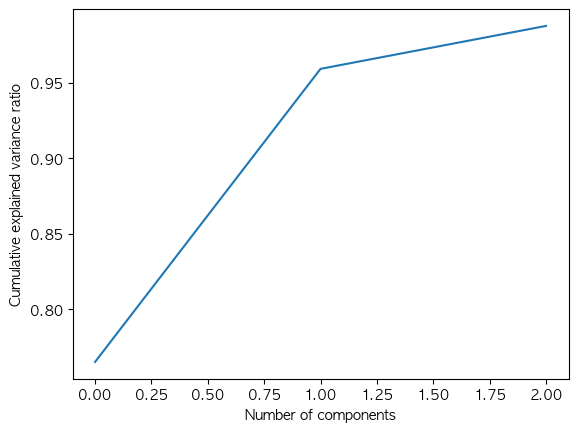

In [29]:
import numpy as np
# PCA 수행
pca = PCA(n_components=3)
pca_result = pca.fit_transform(scaled_data)

# 변환된 데이터의 크기를 출력합니다.
print('Transformed data shape:', pca_result.shape)

# 변환된 데이터의 처음 5개 샘플을 출력합니다.
print('Transformed data:\n', pca_result[:5])

# 설명된 분산의 비율을 확인합니다.
explained_variance_ratio = pca.explained_variance_ratio_
print('Explained variance ratio:', explained_variance_ratio)

# 누적 설명 분산 비율을 계산합니다.
cumulative_variance_ratio = np.cumsum(explained_variance_ratio)

# 누적 설명 분산 비율을 그래프로 나타냅니다.
plt.plot(cumulative_variance_ratio)
plt.xlabel('Number of components')
plt.ylabel('Cumulative explained variance ratio')
plt.show()


### pca heatmap

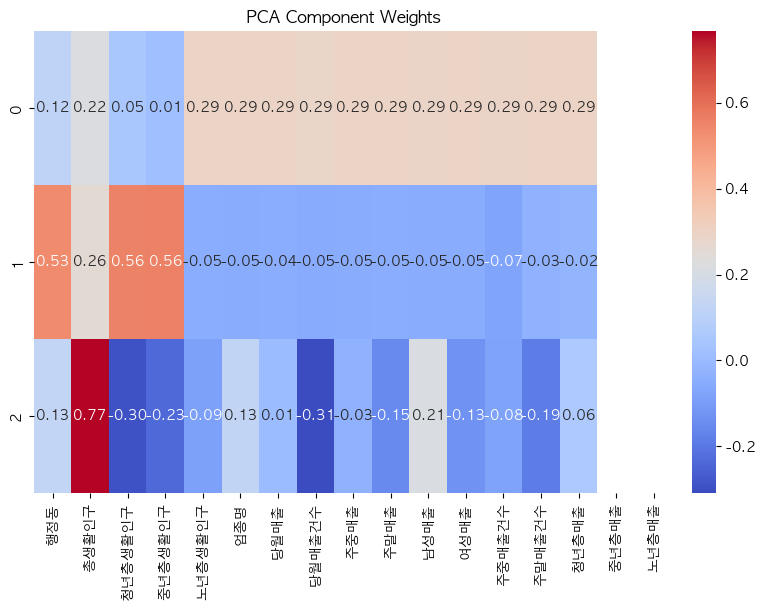

In [30]:

weights = pca.components_
n_components, n_features = weights.shape

# 히트맵 시각화
plt.figure(figsize=(10, 6))
sns.heatmap(weights, cmap='coolwarm', annot=True, fmt='.2f', xticklabels=df.columns)
plt.title('PCA Component Weights')
plt.show()


In [31]:
print(pca.components_)


[[ 0.11683636  0.21900663  0.04577946  0.0147281   0.2935979   0.29193694
   0.29410677  0.28660218  0.29396094  0.29235418  0.28959375  0.2923461
   0.2902698   0.29193636  0.29207532]
 [ 0.53403162  0.25667081  0.55617049  0.55944621 -0.04772491 -0.05144895
  -0.04498671 -0.05321794 -0.04874707 -0.04767194 -0.05154326 -0.05004976
  -0.07480789 -0.03215402 -0.02008367]
 [ 0.1307024   0.76692477 -0.29565941 -0.23434623 -0.08877989  0.12714902
   0.00580373 -0.30933217 -0.03173602 -0.15008807  0.21461474 -0.12932528
  -0.07929623 -0.19110053  0.05929917]]


In [32]:
data

,총생활인구,청년층생활인구,중년층생활인구,노년층생활인구,당월매출,당월매출건수,주중매출,주말매출,남성매출,여성매출,주중매출건수,주말매출건수,청년층매출,중년층매출,노년층매출
0,20029.275242,705.976749,798.124651,762.116328,9.127987e+08,91175,6.179790e+08,2.948196e+08,3.350825e+08,5.301702e+08,64173,27002,170776101,4.177658e+08,2.767109e+08
1,25794.126261,1174.415744,980.947816,796.235593,5.740842e+08,81431,4.182975e+08,1.557867e+08,2.315908e+08,3.379110e+08,61397,20034,181349430,2.214846e+08,1.666679e+08
2,25385.168940,1427.866778,836.701833,664.948278,7.429255e+09,956167,5.060674e+09,2.368581e+09,3.072243e+09,4.182784e+09,685657,270510,3045772032,2.950567e+09,1.258688e+09
3,12256.118586,344.970843,457.245226,525.036416,7.297780e+05,84,6.072200e+05,1.225580e+05,9.470400e+04,6.350740e+05,67,17,328679,3.119660e+05,8.913300e+04
4,13693.338759,369.306231,569.242425,521.320618,6.720000e+08,166109,4.570191e+08,2.149809e+08,3.290132e+08,3.429868e+08,118360,47749,106427970,3.303986e+08,2.351735e+08
5,27724.071524,2042.125592,688.110411,613.346226,4.379913e+09,756352,3.419804e+09,9.601086e+08,1.966162e+09,2.224180e+09,601181,155171,1640885291,1.578394e+09,9.710628e+08
6,15573.252558,594.333209,594.697649,583.734081,3.058762e+08,41844,2.172103e+08,8.866591e+07,1.279983e+08,1.733903e+08,30010,11834,77394749,1.524600e+08,7.153389e+07
7,14137.068857,385.162319,588.872822,515.538664,7.285824e+07,12110,4.663102e+07,2.622722e+07,2.664439e+07,4.621385e+07,7776,4334,22280132,3.272211e+07,1.785600e+07
8,19474.082560,610.331443,766.392796,757.534399,3.834224e+08,39566,2.581816e+08,1.252409e+08,1.632278e+08,1.976845e+08,27601,11965,49734531,1.486382e+08,1.625396e+08
9,17000.780147,1080.922840,422.364444,471.641148,3.904862e+08,93607,3.424443e+08,4.804194e+07,1.760961e+08,2.083317e+08,85887,7720,192530259,7.906707e+07,1.128305e+08


In [33]:
# Create a PCA object.
pca = PCA(n_components=2)

# Normalize data using StandardScaler before extracting principal components.
X_scaled = StandardScaler().fit_transform(data)

# Perform principal component analysis.
X_pca = pca.fit_transform(X_scaled)

## 엘보우 포인트 / 실루엣 계수


/Users/yeong-gwang/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/yeong-gwang/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/yeong-gwang/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/yeong-gwang/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_

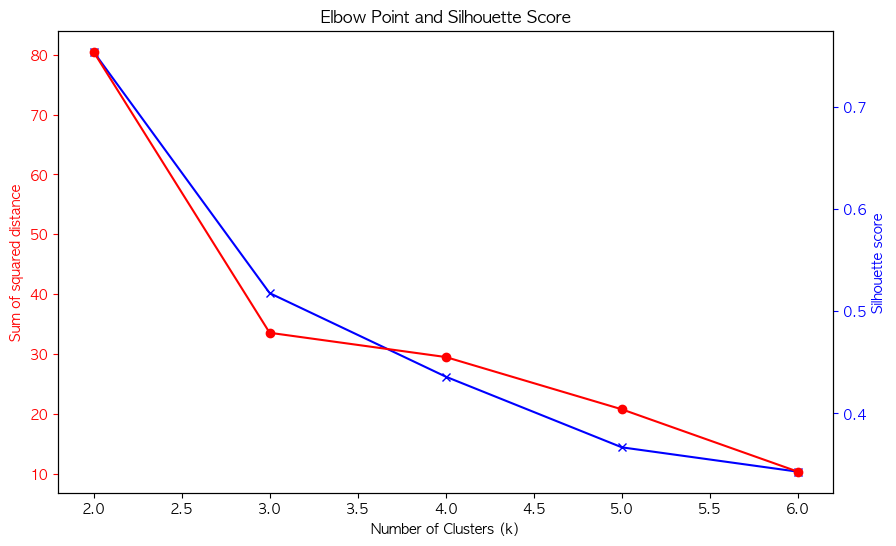

In [35]:
# 엘보우 포인트와 실루엣 계수를 저장할 리스트 초기화
sse = []
silhouette_coefficients = []

# 클러스터링을 위한 k 값 범위 설정
k_range = range(2, 7)

for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_pca)
    sse.append(kmeans.inertia_)
    
    score = silhouette_score(X_pca, kmeans.labels_)
    silhouette_coefficients.append(score)

# 엘보우 포인트 그래프 그리기
fig, ax = plt.subplots(figsize=(10, 6))
ax.plot(k_range, sse, 'bx-')
ax.set_xlabel('Number of Clusters (k)')
ax.set_ylabel('Sum of squared distance', color='r')
ax.set_title('Elbow Point and Silhouette Score')
ax.tick_params('y', colors='r')

# 실루엣 그래프 그리기
ax2 = ax.twinx()
ax2.plot(k_range, silhouette_coefficients, 'ro-')
ax2.set_ylabel('Silhouette score', color='b')
ax2.tick_params('y', colors='b')

plt.show()

## K-MEANS

### 군집 개수 3으로 설정

/Users/yeong-gwang/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/yeong-gwang/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1420: FutureWarning: algorithm='auto' is deprecated, it will be removed in 1.3. Using 'lloyd' instead.
  warnings.warn(


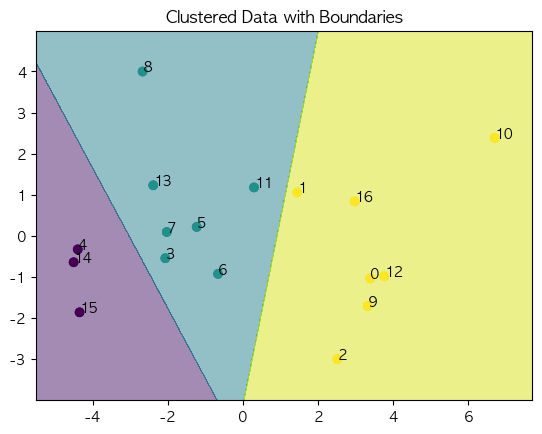

In [107]:
# Create a PCA object.
pca = PCA(n_components=2)

# Normalize data using StandardScaler before extracting principal components.
X_scaled = StandardScaler().fit_transform(data)

# Perform principal component analysis.
X_pca = pca.fit_transform(X_scaled)

kmeans = KMeans(n_clusters=3, init='random', algorithm='auto')
kmeans.fit(X_pca)

# Check the cluster label for each data
cluster_labels = kmeans.labels_

# Visualize clustering results
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=cluster_labels)

# Define the range for the grid
x_min, x_max = X_pca[:, 0].min() - 1, X_pca[:, 0].max() + 1
y_min, y_max = X_pca[:, 1].min() - 1, X_pca[:, 1].max() + 1

# Create a meshgrid of points
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01), np.arange(y_min, y_max, 0.01))

# Predict the cluster labels for each point on the grid
Z = kmeans.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

# Plot the clustered data and the cluster boundaries
plt.contourf(xx, yy, Z, alpha=0.5)
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=cluster_labels)
# Display index value on scatter plot
for i, point in enumerate(X_pca):
    plt.annotate(str(i), xy=point)
    
plt.title('Clustered Data with Boundaries')
plt.show()

#군집화 = 6

/Users/yeong-gwang/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/yeong-gwang/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1420: FutureWarning: algorithm='auto' is deprecated, it will be removed in 1.3. Using 'lloyd' instead.
  warnings.warn(


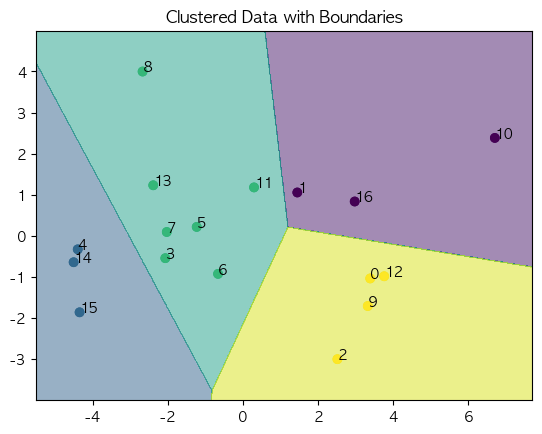

In [108]:
# Create a PCA object.
pca = PCA(n_components=2)

# Normalize data using StandardScaler before extracting principal components.
X_scaled = StandardScaler().fit_transform(data)

# Perform principal component analysis.
X_pca = pca.fit_transform(X_scaled)

kmeans = KMeans(n_clusters=4, init='random', algorithm='auto')
kmeans.fit(X_pca)

# Check the cluster label for each data
cluster_labels = kmeans.labels_

# Visualize clustering results
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=cluster_labels)

# Define the range for the grid
x_min, x_max = X_pca[:, 0].min() - 1, X_pca[:, 0].max() + 1
y_min, y_max = X_pca[:, 1].min() - 1, X_pca[:, 1].max() + 1

# Create a meshgrid of points
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01), np.arange(y_min, y_max, 0.01))

# Predict the cluster labels for each point on the grid
Z = kmeans.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

# Plot the clustered data and the cluster boundaries
plt.contourf(xx, yy, Z, alpha=0.5)
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=cluster_labels)
# Display index value on scatter plot
for i, point in enumerate(X_pca):
    plt.annotate(str(i), xy=point)
    
plt.title('Clustered Data with Boundaries')
plt.show()

#군집화 = 6

/Users/yeong-gwang/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/yeong-gwang/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1420: FutureWarning: algorithm='auto' is deprecated, it will be removed in 1.3. Using 'lloyd' instead.
  warnings.warn(


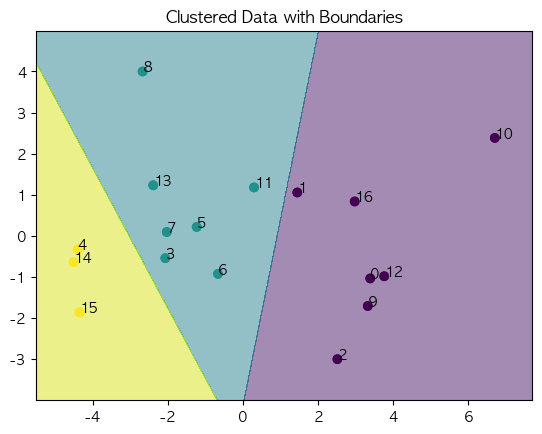

In [110]:
# Create a PCA object.
pca = PCA(n_components=2)

# Normalize data using StandardScaler before extracting principal components.
X_scaled = StandardScaler().fit_transform(data)

# Perform principal component analysis.
X_pca = pca.fit_transform(X_scaled)

kmeans = KMeans(n_clusters=3, init='random', algorithm='auto')
kmeans.fit(X_pca)

# Check the cluster label for each data
cluster_labels = kmeans.labels_

# Visualize clustering results
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=cluster_labels)

# Define the range for the grid
x_min, x_max = X_pca[:, 0].min() - 1, X_pca[:, 0].max() + 1
y_min, y_max = X_pca[:, 1].min() - 1, X_pca[:, 1].max() + 1

# Create a meshgrid of points
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01), np.arange(y_min, y_max, 0.01))

# Predict the cluster labels for each point on the grid
Z = kmeans.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

# Plot the clustered data and the cluster boundaries
plt.contourf(xx, yy, Z, alpha=0.5)
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=cluster_labels)
# Display index value on scatter plot
for i, point in enumerate(X_pca):
    plt.annotate(str(i), xy=point)
    
plt.title('Clustered Data with Boundaries')
plt.show()

#군집화 = 6

In [111]:
cluster_labels #=> 군집화 3으로 설정

array([0, 0, 0, 1, 2, 1, 1, 1, 1, 0, 0, 1, 0, 1, 2, 2, 0], dtype=int32)

In [115]:
df['kmeans_label']=cluster_labels
df

,행정동,총생활인구,청년층생활인구,중년층생활인구,노년층생활인구,업종명,당월매출,당월매출건수,주중매출,주말매출,남성매출,여성매출,주중매출건수,주말매출건수,청년층매출,중년층매출,노년층매출,kmeans_label,gmm_labels,y_kmedoids
0,성북동,20029.275242,705.976749,798.124651,762.116328,커피-음료,9.127987e+08,91175,617979023.0,294819638.0,335082498.0,530170213.0,64173,27002,170776101,417765765.0,276710851.0,0,1,3
1,삼선동,25794.126261,1174.415744,980.947816,796.235593,커피-음료,5.740842e+08,81431,418297483.0,155786688.0,231590833.0,337911029.0,61397,20034,181349430,221484570.0,166667867.0,0,4,3
4,돈암2동,13693.338759,369.306231,569.242425,521.320618,커피-음료,6.720000e+08,166109,457019137.0,214980863.0,329013164.0,342986836.0,118360,47749,106427970,330398555.0,235173475.0,0,1,0
6,보문동,15573.252558,594.333209,594.697649,583.734081,커피-음료,3.058762e+08,41844,217210327.0,88665912.0,127998322.0,173390342.0,30010,11834,77394749,152460029.0,71533888.0,1,0,1
7,정릉1동,14137.068857,385.162319,588.872822,515.538664,커피-음료,7.285824e+07,12110,46631020.0,26227224.0,26644391.0,46213853.0,7776,4334,22280132,32722111.0,17856001.0,2,2,2
8,정릉2동,19474.082560,610.331443,766.392796,757.534399,커피-음료,3.834224e+08,39566,258181553.0,125240877.0,163227841.0,197684530.0,27601,11965,49734531,148638211.0,162539624.0,1,0,1
9,정릉3동,17000.780147,1080.922840,422.364444,471.641148,커피-음료,3.904862e+08,93607,342444277.0,48041943.0,176096081.0,208331717.0,85887,7720,192530259,79067069.0,112830469.0,1,0,1
10,정릉4동,18306.562778,604.699627,685.126756,733.101946,커피-음료,2.760877e+08,53270,221813188.0,54274528.0,103485678.0,148606366.0,43454,9816,101674298,87688653.0,62729093.0,1,0,1
11,길음1동,34012.789809,886.469838,1442.269362,992.788750,커피-음료,1.041585e+08,15042,74540807.0,29617690.0,40674987.0,62923454.0,10970,4072,15393875,60701443.0,27503123.0,1,3,1
12,길음2동,18238.809083,495.892139,808.117392,648.787250,커피-음료,9.286120e+08,106985,678532633.0,250079400.0,316603992.0,578183252.0,78473,28512,119448668,514330615.0,261007963.0,0,1,0


## GMM(GaussianMixture)

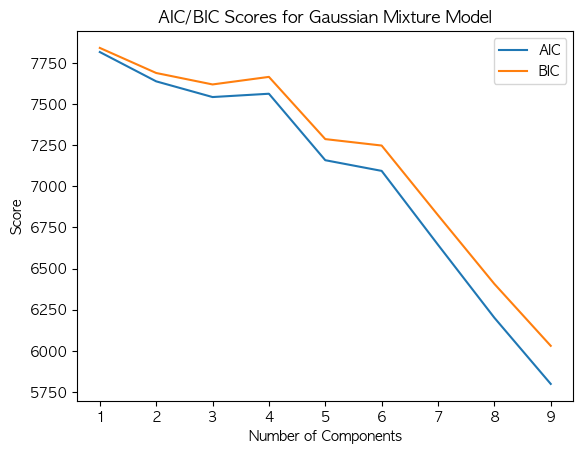

In [112]:
from sklearn.mixture import GaussianMixture

n_components_range = range(1, 10)
aic_values = []
bic_values = []
for n_components in n_components_range:
    #model = GaussianMixture(n_components=n_components, random_state=0)
    model = GaussianMixture(n_components=n_components, covariance_type='diag', random_state=0)
#covariance_type을 변경하니 해결됨 ->diag 
    model.fit(data)  # X는 클러스터링할 데이터입니다.
    aic = model.aic(data)
    bic = model.bic(data)
    aic_values.append(aic)
    bic_values.append(bic)

#AIC와 BIC 값을 플롯에 표시합니다.
plt.plot(n_components_range, aic_values, label='AIC')
plt.plot(n_components_range, bic_values, label='BIC')

# 플롯의 스타일과 레이블 등을 설정합니다.
plt.title('AIC/BIC Scores for Gaussian Mixture Model')
plt.xlabel('Number of Components')
plt.ylabel('Score')
plt.legend()

# 그래프를 보여줍니다.
plt.show()

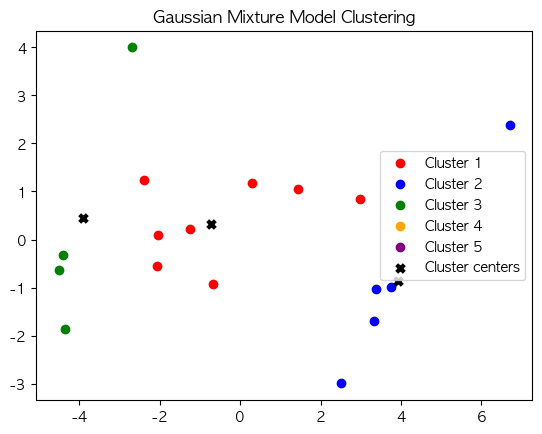

In [113]:
# gmm 모델 인스턴스화
gmm = GaussianMixture(n_components=3, random_state=42)

# 모델 학습
gmm.fit(X_pca)

# 클러스터 예측
centers = gmm.means_

labels = gmm.predict(X_pca)

pca = PCA(n_components=2)
pca_result = pca.fit_transform(X_pca)

colors = ['red', 'blue', 'green', 'orange', 'purple']

fig, ax = plt.subplots()

for i in range(5):
    ax.scatter(pca_result[labels == i, 0], pca_result[labels == i, 1], color=colors[i], label=f"Cluster {i+1}")
ax.scatter(centers[:, 0], centers[:, 1], color='black', marker='x', s=30, linewidth=3, label="Cluster centers")

# Chart settings
ax.set_title('Gaussian Mixture Model Clustering')
ax.legend()
plt.show()
# 1 11 2

In [114]:
labels

array([1, 0, 1, 0, 2, 0, 0, 0, 2, 1, 1, 0, 1, 0, 2, 2, 0])

In [116]:
df['gmm_labels']=labels
df

,행정동,총생활인구,청년층생활인구,중년층생활인구,노년층생활인구,업종명,당월매출,당월매출건수,주중매출,주말매출,남성매출,여성매출,주중매출건수,주말매출건수,청년층매출,중년층매출,노년층매출,kmeans_label,gmm_labels,y_kmedoids
0,성북동,20029.275242,705.976749,798.124651,762.116328,커피-음료,9.127987e+08,91175,617979023.0,294819638.0,335082498.0,530170213.0,64173,27002,170776101,417765765.0,276710851.0,0,1,3
1,삼선동,25794.126261,1174.415744,980.947816,796.235593,커피-음료,5.740842e+08,81431,418297483.0,155786688.0,231590833.0,337911029.0,61397,20034,181349430,221484570.0,166667867.0,0,0,3
4,돈암2동,13693.338759,369.306231,569.242425,521.320618,커피-음료,6.720000e+08,166109,457019137.0,214980863.0,329013164.0,342986836.0,118360,47749,106427970,330398555.0,235173475.0,0,1,0
6,보문동,15573.252558,594.333209,594.697649,583.734081,커피-음료,3.058762e+08,41844,217210327.0,88665912.0,127998322.0,173390342.0,30010,11834,77394749,152460029.0,71533888.0,1,0,1
7,정릉1동,14137.068857,385.162319,588.872822,515.538664,커피-음료,7.285824e+07,12110,46631020.0,26227224.0,26644391.0,46213853.0,7776,4334,22280132,32722111.0,17856001.0,2,2,2
8,정릉2동,19474.082560,610.331443,766.392796,757.534399,커피-음료,3.834224e+08,39566,258181553.0,125240877.0,163227841.0,197684530.0,27601,11965,49734531,148638211.0,162539624.0,1,0,1
9,정릉3동,17000.780147,1080.922840,422.364444,471.641148,커피-음료,3.904862e+08,93607,342444277.0,48041943.0,176096081.0,208331717.0,85887,7720,192530259,79067069.0,112830469.0,1,0,1
10,정릉4동,18306.562778,604.699627,685.126756,733.101946,커피-음료,2.760877e+08,53270,221813188.0,54274528.0,103485678.0,148606366.0,43454,9816,101674298,87688653.0,62729093.0,1,0,1
11,길음1동,34012.789809,886.469838,1442.269362,992.788750,커피-음료,1.041585e+08,15042,74540807.0,29617690.0,40674987.0,62923454.0,10970,4072,15393875,60701443.0,27503123.0,1,2,1
12,길음2동,18238.809083,495.892139,808.117392,648.787250,커피-음료,9.286120e+08,106985,678532633.0,250079400.0,316603992.0,578183252.0,78473,28512,119448668,514330615.0,261007963.0,0,1,0


# PAM

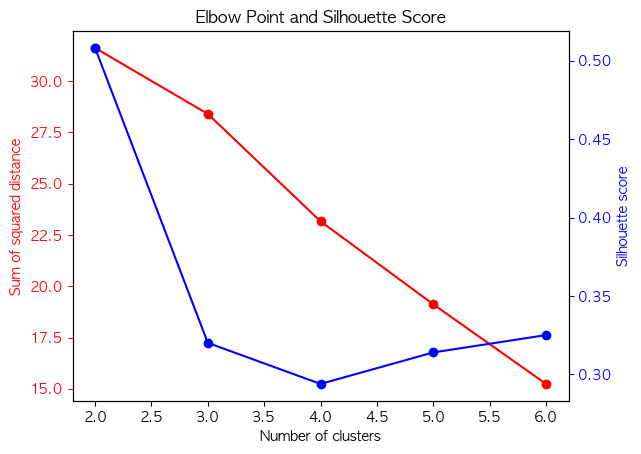

In [117]:
# k-medoids 알고리즘 적용
elbow_scores = []
silhouette_scores = []
for n_clusters in range(2, 7):
    kmedoids = KMedoids(n_clusters=n_clusters).fit(X_pca)
    elbow_scores.append(kmedoids.inertia_)
    silhouette_scores.append(silhouette_score(X_pca, kmedoids.labels_))

# 엘보우 포인트와 실루엣 값을 그래프에 시각화
fig, ax1 = plt.subplots()

# 엘보우 포인트 그래프
ax1.plot(range(2, 7), elbow_scores, 'o-', color='r')
ax1.set_xlabel('Number of clusters')
ax1.set_ylabel('Sum of squared distance', color='r')
ax1.tick_params('y', colors='r')

# 실루엣 값 그래프
ax2 = ax1.twinx()
ax2.plot(range(2, 7), silhouette_scores, 'o-', color='b')
ax2.set_ylabel('Silhouette score', color='b')
ax2.tick_params('y', colors='b')

plt.title('Elbow Point and Silhouette Score')
plt.show()

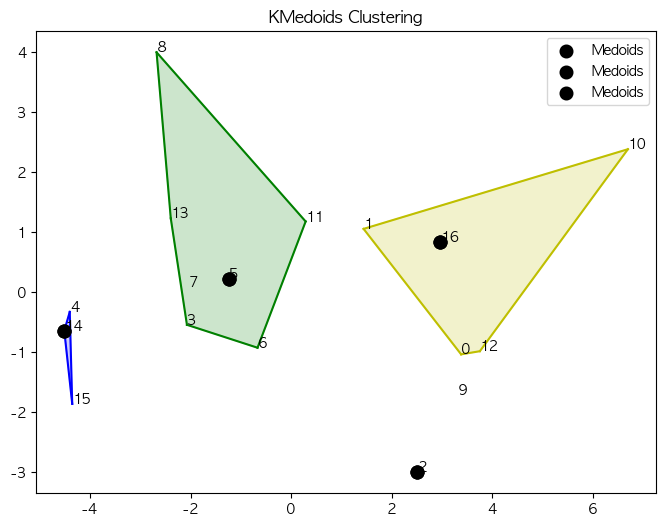

In [121]:

# Create and train KMedoids models
kmedoids = KMedoids(n_clusters=4, random_state=0)
y_kmedoids = kmedoids.fit_predict(X_pca)

# Define cluster colors
colors = ['r', 'g', 'b', 'y']

# Create subplots
fig, ax = plt.subplots(figsize=(8, 6))

# Plot each cluster with different color and label
for i in range(4):
    cluster_points = X_pca[y_kmedoids == i]
    
    if len(cluster_points) >= 3:
        # Get indices of outermost points in the cluster
        hull = ConvexHull(cluster_points)
        outermost_points_idx = hull.vertices
        
        # Plot lines connecting outermost points and fill interior space
        n_points = len(outermost_points_idx)
        for j in range(n_points):
            ax.plot([cluster_points[outermost_points_idx[j], 0], cluster_points[outermost_points_idx[(j+1)%n_points], 0]],
                    [cluster_points[outermost_points_idx[j], 1], cluster_points[outermost_points_idx[(j+1)%n_points], 1]], color=colors[i])
        ax.fill(cluster_points[outermost_points_idx, 0], cluster_points[outermost_points_idx, 1], color=colors[i], alpha=0.2)
        
        # Plot Medoids as black markers
        medoids = kmedoids.cluster_centers_
        ax.scatter(medoids[:, 0], medoids[:, 1], marker='o', s=50,
                   linewidths=3, color='black', zorder=10, label='Medoids')

# Add point indices to the plot
for i, point in enumerate(X_pca):
    ax.annotate(str(i), xy=point)

# Set plot title and legend
ax.set_title('KMedoids Clustering')
ax.legend()

# Show the plot
plt.show()


In [122]:
df['y_kmedoids']=y_kmedoids
df

,행정동,총생활인구,청년층생활인구,중년층생활인구,노년층생활인구,업종명,당월매출,당월매출건수,주중매출,주말매출,남성매출,여성매출,주중매출건수,주말매출건수,청년층매출,중년층매출,노년층매출,kmeans_label,gmm_labels,y_kmedoids
0,성북동,20029.275242,705.976749,798.124651,762.116328,커피-음료,9.127987e+08,91175,617979023.0,294819638.0,335082498.0,530170213.0,64173,27002,170776101,417765765.0,276710851.0,0,1,3
1,삼선동,25794.126261,1174.415744,980.947816,796.235593,커피-음료,5.740842e+08,81431,418297483.0,155786688.0,231590833.0,337911029.0,61397,20034,181349430,221484570.0,166667867.0,0,0,3
4,돈암2동,13693.338759,369.306231,569.242425,521.320618,커피-음료,6.720000e+08,166109,457019137.0,214980863.0,329013164.0,342986836.0,118360,47749,106427970,330398555.0,235173475.0,0,1,0
6,보문동,15573.252558,594.333209,594.697649,583.734081,커피-음료,3.058762e+08,41844,217210327.0,88665912.0,127998322.0,173390342.0,30010,11834,77394749,152460029.0,71533888.0,1,0,1
7,정릉1동,14137.068857,385.162319,588.872822,515.538664,커피-음료,7.285824e+07,12110,46631020.0,26227224.0,26644391.0,46213853.0,7776,4334,22280132,32722111.0,17856001.0,2,2,2
8,정릉2동,19474.082560,610.331443,766.392796,757.534399,커피-음료,3.834224e+08,39566,258181553.0,125240877.0,163227841.0,197684530.0,27601,11965,49734531,148638211.0,162539624.0,1,0,1
9,정릉3동,17000.780147,1080.922840,422.364444,471.641148,커피-음료,3.904862e+08,93607,342444277.0,48041943.0,176096081.0,208331717.0,85887,7720,192530259,79067069.0,112830469.0,1,0,1
10,정릉4동,18306.562778,604.699627,685.126756,733.101946,커피-음료,2.760877e+08,53270,221813188.0,54274528.0,103485678.0,148606366.0,43454,9816,101674298,87688653.0,62729093.0,1,0,1
11,길음1동,34012.789809,886.469838,1442.269362,992.788750,커피-음료,1.041585e+08,15042,74540807.0,29617690.0,40674987.0,62923454.0,10970,4072,15393875,60701443.0,27503123.0,1,2,1
12,길음2동,18238.809083,495.892139,808.117392,648.787250,커피-음료,9.286120e+08,106985,678532633.0,250079400.0,316603992.0,578183252.0,78473,28512,119448668,514330615.0,261007963.0,0,1,0


확인해보니 돈암1동의 매출건수가 상당히 낮게 책정됐음 -> 삭제하고 다시 진행 

In [123]:
df=df[df['행정동']!='돈암1동'] #돈암1동은 제거

In [124]:
df

,행정동,총생활인구,청년층생활인구,중년층생활인구,노년층생활인구,업종명,당월매출,당월매출건수,주중매출,주말매출,남성매출,여성매출,주중매출건수,주말매출건수,청년층매출,중년층매출,노년층매출,kmeans_label,gmm_labels,y_kmedoids
0,성북동,20029.275242,705.976749,798.124651,762.116328,커피-음료,9.127987e+08,91175,617979023.0,294819638.0,335082498.0,530170213.0,64173,27002,170776101,417765765.0,276710851.0,0,1,3
1,삼선동,25794.126261,1174.415744,980.947816,796.235593,커피-음료,5.740842e+08,81431,418297483.0,155786688.0,231590833.0,337911029.0,61397,20034,181349430,221484570.0,166667867.0,0,0,3
4,돈암2동,13693.338759,369.306231,569.242425,521.320618,커피-음료,6.720000e+08,166109,457019137.0,214980863.0,329013164.0,342986836.0,118360,47749,106427970,330398555.0,235173475.0,0,1,0
6,보문동,15573.252558,594.333209,594.697649,583.734081,커피-음료,3.058762e+08,41844,217210327.0,88665912.0,127998322.0,173390342.0,30010,11834,77394749,152460029.0,71533888.0,1,0,1
7,정릉1동,14137.068857,385.162319,588.872822,515.538664,커피-음료,7.285824e+07,12110,46631020.0,26227224.0,26644391.0,46213853.0,7776,4334,22280132,32722111.0,17856001.0,2,2,2
8,정릉2동,19474.082560,610.331443,766.392796,757.534399,커피-음료,3.834224e+08,39566,258181553.0,125240877.0,163227841.0,197684530.0,27601,11965,49734531,148638211.0,162539624.0,1,0,1
9,정릉3동,17000.780147,1080.922840,422.364444,471.641148,커피-음료,3.904862e+08,93607,342444277.0,48041943.0,176096081.0,208331717.0,85887,7720,192530259,79067069.0,112830469.0,1,0,1
10,정릉4동,18306.562778,604.699627,685.126756,733.101946,커피-음료,2.760877e+08,53270,221813188.0,54274528.0,103485678.0,148606366.0,43454,9816,101674298,87688653.0,62729093.0,1,0,1
11,길음1동,34012.789809,886.469838,1442.269362,992.788750,커피-음료,1.041585e+08,15042,74540807.0,29617690.0,40674987.0,62923454.0,10970,4072,15393875,60701443.0,27503123.0,1,2,1
12,길음2동,18238.809083,495.892139,808.117392,648.787250,커피-음료,9.286120e+08,106985,678532633.0,250079400.0,316603992.0,578183252.0,78473,28512,119448668,514330615.0,261007963.0,0,1,0


# 재진행

In [125]:
selected_columns = ['총생활인구', '청년층생활인구', '중년층생활인구', '노년층생활인구', '당월매출', '당월매출건수', '주중매출', '주말매출', 
                    '남성매출', '여성매출', '주중매출건수', '주말매출건수', '청년층매출', '중년층매출', '노년층매출']
data = df[selected_columns]

In [126]:
# 데이터 표준화
scaler = StandardScaler()
scaled_data = scaler.fit_transform(data)

Transformed data shape: (17, 5)
Transformed data:
 [[ 3.38333852e+00 -1.03363274e+00 -9.05095148e-01 -1.17483064e+00
  -7.24058382e-02]
 [ 1.44147118e+00  1.05697496e+00  1.04560813e+00 -4.83155178e-01
  -4.06814799e-01]
 [ 2.50952007e+00 -2.99758546e+00 -4.72349446e-01  1.92777706e+00
  -2.28589494e-01]
 [-2.07443446e+00 -5.41100180e-01  2.43508512e-02 -2.51851825e-01
  -3.20793946e-02]
 [-4.40638823e+00 -3.26201846e-01 -2.37709368e-01  2.43966035e-04
   1.13453558e-01]]
Explained variance ratio: [0.70940339 0.17840584 0.06178466 0.02714508 0.00832952]
cumulative_variance_ratio: [0.70940339 0.88780923 0.94959389 0.97673897 0.9850685 ]


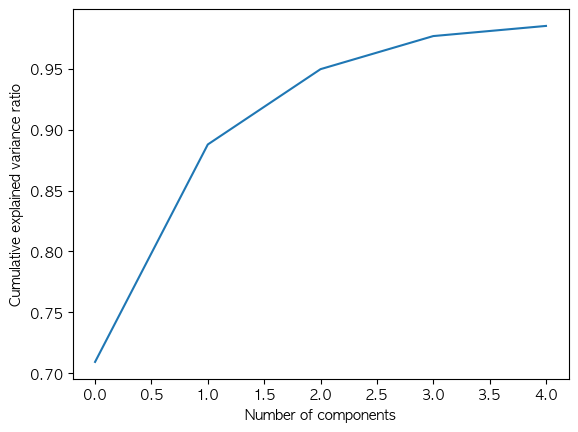

In [127]:

# PCA 수행
pca = PCA(n_components=5)
pca_result = pca.fit_transform(scaled_data)

# 변환된 데이터의 크기를 출력합니다.
print('Transformed data shape:', pca_result.shape)

# 변환된 데이터의 처음 5개 샘플을 출력합니다.
print('Transformed data:\n', pca_result[:5])

# 설명된 분산의 비율을 확인합니다.
explained_variance_ratio = pca.explained_variance_ratio_
print('Explained variance ratio:', explained_variance_ratio)

# 누적 설명 분산 비율을 계산합니다.
cumulative_variance_ratio = np.cumsum(explained_variance_ratio)
print('cumulative_variance_ratio:', cumulative_variance_ratio)

# 누적 설명 분산 비율을 그래프로 나타냅니다.
plt.plot(cumulative_variance_ratio)
plt.xlabel('Number of components')
plt.ylabel('Cumulative explained variance ratio')
plt.show()


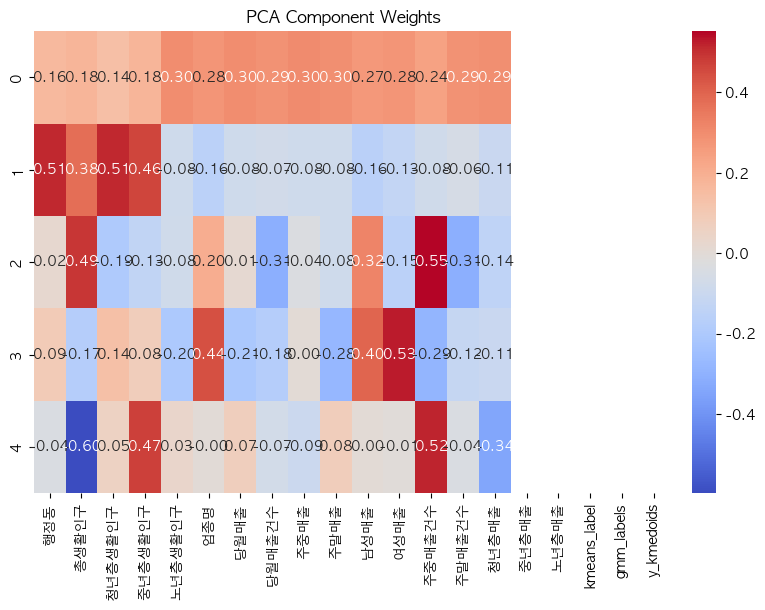

In [128]:
rc('font',family='AppleGothic')
plt.rcParams['axes.unicode_minus'] = False

weights = pca.components_
n_components, n_features = weights.shape

# 히트맵 시각화
plt.figure(figsize=(10, 6))
sns.heatmap(weights, cmap='coolwarm', annot=True, fmt='.2f', xticklabels=df.columns)
plt.title('PCA Component Weights')
plt.show()


In [129]:
print(pca.components_)


[[ 0.16440914  0.17711298  0.14269456  0.17728549  0.30022076  0.27690736
   0.29984551  0.28505373  0.30137784  0.29529095  0.2678706   0.27553546
   0.24200589  0.28663506  0.29224869]
 [ 0.51275658  0.37500073  0.51220997  0.46410835 -0.08079303 -0.15511627
  -0.08169261 -0.07422372 -0.08056063 -0.08251783 -0.15953925 -0.12738542
  -0.07914889 -0.05700906 -0.10693222]
 [ 0.02253265  0.49142486 -0.19295061 -0.13060506 -0.08013217  0.20456653
   0.01400615 -0.30988655 -0.03525657 -0.08475157  0.32327558 -0.15286492
   0.55249884 -0.31211409 -0.14227076]
 [ 0.09162598 -0.1747803   0.13546913  0.08063434 -0.20334117  0.44146943
  -0.21030719 -0.17511727  0.00160812 -0.28185925  0.39542324  0.52921888
  -0.2898558  -0.11824662 -0.10576695]
 [-0.03769801 -0.5965812   0.05492502  0.4718726   0.03247175 -0.00076101
   0.07304342 -0.07014105 -0.09447067  0.08095443  0.00143705 -0.00693481
   0.52074023 -0.03770101 -0.34286861]]


In [130]:
# Create a PCA object.
pca = PCA(n_components=2)

# Normalize data using StandardScaler before extracting principal components.
X_scaled = StandardScaler().fit_transform(data)

# Perform principal component analysis.
X_pca = pca.fit_transform(X_scaled)

/Users/yeong-gwang/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/yeong-gwang/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/yeong-gwang/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/yeong-gwang/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_

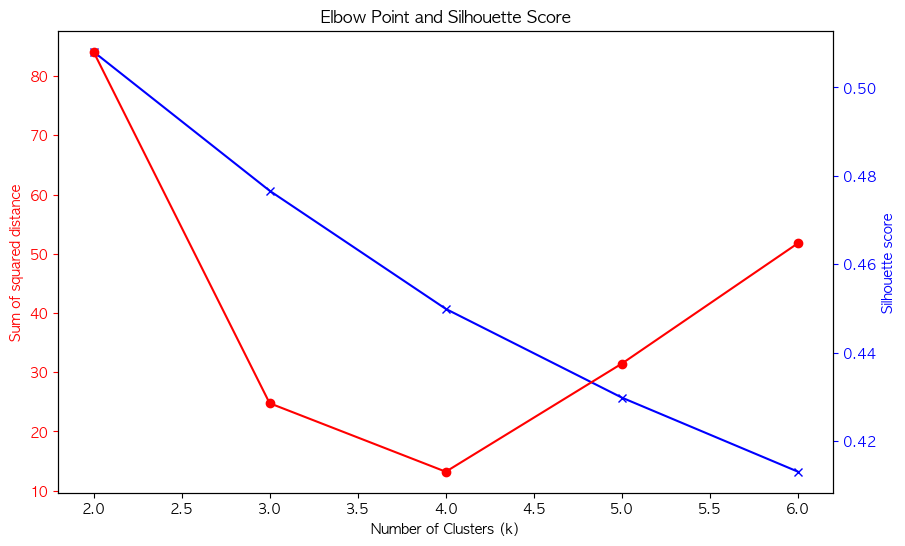

In [131]:
# 엘보우 포인트와 실루엣 계수를 저장할 리스트 초기화
sse = []
silhouette_coefficients = []

# 클러스터링을 위한 k 값 범위 설정
k_range = range(2, 7)

for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_pca)
    sse.append(kmeans.inertia_)
    
    score = silhouette_score(X_pca, kmeans.labels_)
    silhouette_coefficients.append(score)

# 엘보우 포인트 그래프 그리기
fig, ax = plt.subplots(figsize=(10, 6))
ax.plot(k_range, sse, 'bx-')
ax.set_xlabel('Number of Clusters (k)')
ax.set_ylabel('Sum of squared distance', color='r')
ax.set_title('Elbow Point and Silhouette Score')
ax.tick_params('y', colors='r')

# 실루엣 그래프 그리기
ax2 = ax.twinx()
ax2.plot(k_range, silhouette_coefficients, 'ro-')
ax2.set_ylabel('Silhouette score', color='b')
ax2.tick_params('y', colors='b')

plt.show()

/Users/yeong-gwang/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/yeong-gwang/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1420: FutureWarning: algorithm='auto' is deprecated, it will be removed in 1.3. Using 'lloyd' instead.
  warnings.warn(


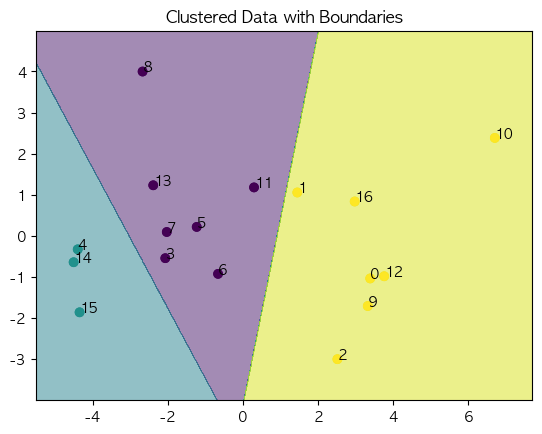

In [134]:

# Create a PCA object.
pca = PCA(n_components=2)

# Normalize data using StandardScaler before extracting principal components.
X_scaled = StandardScaler().fit_transform(data)

# Perform principal component analysis.
X_pca = pca.fit_transform(X_scaled)

kmeans = KMeans(n_clusters=3, init='random', algorithm='auto')
kmeans.fit(X_pca)

# Check the cluster label for each data
cluster_labels = kmeans.labels_

# Visualize clustering results
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=cluster_labels)

# Define the range for the grid
x_min, x_max = X_pca[:, 0].min() - 1, X_pca[:, 0].max() + 1
y_min, y_max = X_pca[:, 1].min() - 1, X_pca[:, 1].max() + 1

# Create a meshgrid of points
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01), np.arange(y_min, y_max, 0.01))

# Predict the cluster labels for each point on the grid
Z = kmeans.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

# Plot the clustered data and the cluster boundaries
plt.contourf(xx, yy, Z, alpha=0.5)
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=cluster_labels)
# Display index value on scatter plot
for i, point in enumerate(X_pca):
    plt.annotate(str(i), xy=point)
    
plt.title('Clustered Data with Boundaries')
plt.show()

#군집화 = 6

In [135]:
cluster_labels

array([2, 2, 2, 0, 1, 0, 0, 0, 0, 2, 2, 0, 2, 0, 1, 1, 2], dtype=int32)

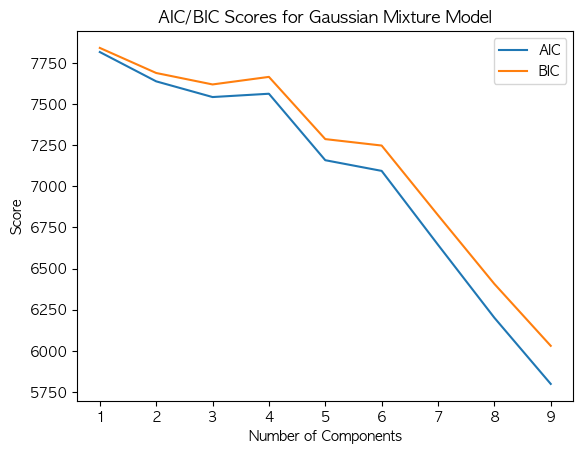

In [136]:
from sklearn.mixture import GaussianMixture

n_components_range = range(1, 10)
aic_values = []
bic_values = []
for n_components in n_components_range:
    #model = GaussianMixture(n_components=n_components, random_state=0)
    model = GaussianMixture(n_components=n_components, covariance_type='diag', random_state=0)
#covariance_type을 변경하니 해결됨 ->diag 
    model.fit(data)  # X는 클러스터링할 데이터입니다.
    aic = model.aic(data)
    bic = model.bic(data)
    aic_values.append(aic)
    bic_values.append(bic)

#AIC와 BIC 값을 플롯에 표시합니다.
plt.plot(n_components_range, aic_values, label='AIC')
plt.plot(n_components_range, bic_values, label='BIC')

# 플롯의 스타일과 레이블 등을 설정합니다.
plt.title('AIC/BIC Scores for Gaussian Mixture Model')
plt.xlabel('Number of Components')
plt.ylabel('Score')
plt.legend()

# 그래프를 보여줍니다.
plt.show()

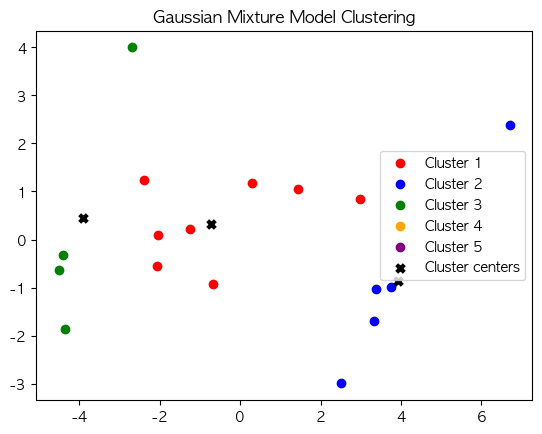

In [137]:
# gmm 모델 인스턴스화
gmm = GaussianMixture(n_components=3, random_state=42)

# 모델 학습
gmm.fit(X_pca)

# 클러스터 예측
centers = gmm.means_

labels = gmm.predict(X_pca)

pca = PCA(n_components=2)
pca_result = pca.fit_transform(X_pca)

colors = ['red', 'blue', 'green', 'orange', 'purple']

fig, ax = plt.subplots()

for i in range(5):
    ax.scatter(pca_result[labels == i, 0], pca_result[labels == i, 1], color=colors[i], label=f"Cluster {i+1}")
ax.scatter(centers[:, 0], centers[:, 1], color='black', marker='x', s=30, linewidth=3, label="Cluster centers")

# Chart settings
ax.set_title('Gaussian Mixture Model Clustering')
ax.legend()
plt.show()
# 1 11 2

In [138]:
labels

array([1, 0, 1, 0, 2, 0, 0, 0, 2, 1, 1, 0, 1, 0, 2, 2, 0])

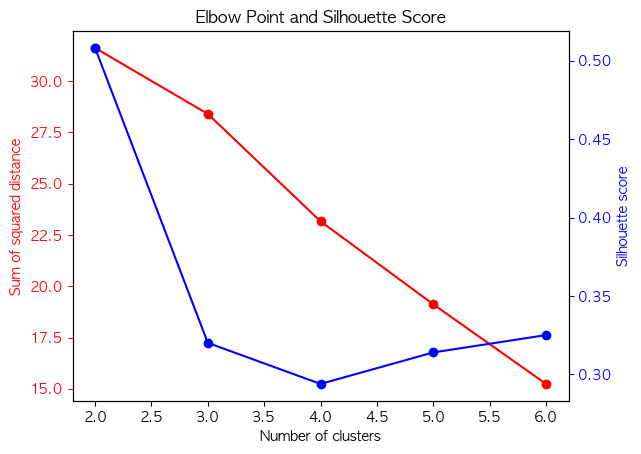

In [140]:
# k-medoids 알고리즘 적용
elbow_scores = []
silhouette_scores = []
for n_clusters in range(2, 7):
    kmedoids = KMedoids(n_clusters=n_clusters).fit(X_pca)
    elbow_scores.append(kmedoids.inertia_)
    silhouette_scores.append(silhouette_score(X_pca, kmedoids.labels_))

# 엘보우 포인트와 실루엣 값을 그래프에 시각화
fig, ax1 = plt.subplots()

# 엘보우 포인트 그래프
ax1.plot(range(2, 7), elbow_scores, 'o-', color='r')
ax1.set_xlabel('Number of clusters')
ax1.set_ylabel('Sum of squared distance', color='r')
ax1.tick_params('y', colors='r')

# 실루엣 값 그래프
ax2 = ax1.twinx()
ax2.plot(range(2, 7), silhouette_scores, 'o-', color='b')
ax2.set_ylabel('Silhouette score', color='b')
ax2.tick_params('y', colors='b')

plt.title('Elbow Point and Silhouette Score')
plt.show()

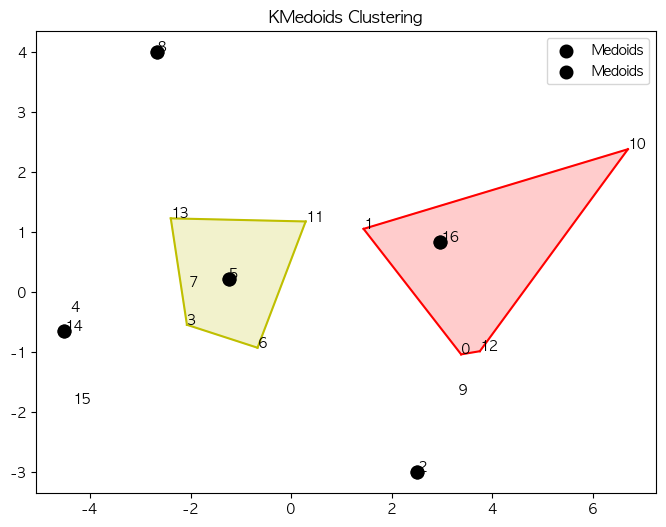

In [141]:


# Create and train KMedoids models
kmedoids = KMedoids(n_clusters=5, random_state=0)
y_kmedoids = kmedoids.fit_predict(X_pca)

# Define cluster colors
colors = ['r', 'g', 'b', 'y']

# Create subplots
fig, ax = plt.subplots(figsize=(8, 6))

# Plot each cluster with different color and label
for i in range(4):
    cluster_points = X_pca[y_kmedoids == i]
    
    if len(cluster_points) >= 3:
        # Get indices of outermost points in the cluster
        hull = ConvexHull(cluster_points)
        outermost_points_idx = hull.vertices
        
        # Plot lines connecting outermost points and fill interior space
        n_points = len(outermost_points_idx)
        for j in range(n_points):
            ax.plot([cluster_points[outermost_points_idx[j], 0], cluster_points[outermost_points_idx[(j+1)%n_points], 0]],
                    [cluster_points[outermost_points_idx[j], 1], cluster_points[outermost_points_idx[(j+1)%n_points], 1]], color=colors[i])
        ax.fill(cluster_points[outermost_points_idx, 0], cluster_points[outermost_points_idx, 1], color=colors[i], alpha=0.2)
        
        # Plot Medoids as black markers
        medoids = kmedoids.cluster_centers_
        ax.scatter(medoids[:, 0], medoids[:, 1], marker='o', s=50,
                   linewidths=3, color='black', zorder=10, label='Medoids')

# Add point indices to the plot
for i, point in enumerate(X_pca):
    ax.annotate(str(i), xy=point)

# Set plot title and legend
ax.set_title('KMedoids Clustering')
ax.legend()

# Show the plot
plt.show()


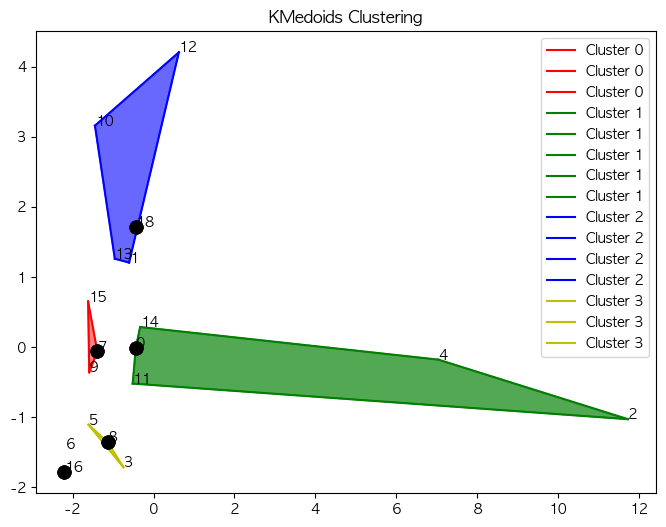

In [63]:
from scipy.spatial import ConvexHull
from sklearn_extra.cluster import KMedoids
import matplotlib.pyplot as plt
from matplotlib.lines import Line2D

# Assume X_pca is your data
# ...

# Create and train KMedoids models
kmedoids = KMedoids(n_clusters=5, random_state=0)
y_kmedoids = kmedoids.fit_predict(X_pca)

# Define cluster colors
colors = ['r', 'g', 'b', 'y']

# Create subplots
fig, ax = plt.subplots(figsize=(8, 6))

# Create a list to store Line2D objects for the legend
legend_lines = []

# Plot each cluster with different color and label
for i in range(4):
    cluster_points = X_pca[y_kmedoids == i]
    
    if len(cluster_points) >= 3:
        # Get indices of outermost points in the cluster
        hull = ConvexHull(cluster_points)
        outermost_points_idx = hull.vertices
        
        # Plot lines connecting outermost points and fill interior space
        n_points = len(outermost_points_idx)
        for j in range(n_points):
            line = ax.plot([cluster_points[outermost_points_idx[j], 0], cluster_points[outermost_points_idx[(j+1)%n_points], 0]],
                           [cluster_points[outermost_points_idx[j], 1], cluster_points[outermost_points_idx[(j+1)%n_points], 1]], color=colors[i])
            ax.fill(cluster_points[outermost_points_idx, 0], cluster_points[outermost_points_idx, 1], color=colors[i], alpha=0.2)
            
            # Append Line2D object to the legend_lines list
            legend_lines.append(Line2D([0], [0], color=colors[i], label=f'Cluster {i}'))

        # Plot Medoids as black markers
        medoids = kmedoids.cluster_centers_
        ax.scatter(medoids[:, 0], medoids[:, 1], marker='o', s=50,
                   linewidths=3, color='black', zorder=10, label='Medoids')

# Add point indices to the plot
for i, point in enumerate(X_pca):
    ax.annotate(str(i), xy=point)

# Set plot title
ax.set_title('KMedoids Clustering')

# Add legend with custom lines
ax.legend(handles=legend_lines)

# Show the plot
plt.show()


In [142]:
df

,행정동,총생활인구,청년층생활인구,중년층생활인구,노년층생활인구,업종명,당월매출,당월매출건수,주중매출,주말매출,남성매출,여성매출,주중매출건수,주말매출건수,청년층매출,중년층매출,노년층매출,kmeans_label,gmm_labels,y_kmedoids
0,성북동,20029.275242,705.976749,798.124651,762.116328,커피-음료,9.127987e+08,91175,617979023.0,294819638.0,335082498.0,530170213.0,64173,27002,170776101,417765765.0,276710851.0,0,1,3
1,삼선동,25794.126261,1174.415744,980.947816,796.235593,커피-음료,5.740842e+08,81431,418297483.0,155786688.0,231590833.0,337911029.0,61397,20034,181349430,221484570.0,166667867.0,0,0,3
4,돈암2동,13693.338759,369.306231,569.242425,521.320618,커피-음료,6.720000e+08,166109,457019137.0,214980863.0,329013164.0,342986836.0,118360,47749,106427970,330398555.0,235173475.0,0,1,0
6,보문동,15573.252558,594.333209,594.697649,583.734081,커피-음료,3.058762e+08,41844,217210327.0,88665912.0,127998322.0,173390342.0,30010,11834,77394749,152460029.0,71533888.0,1,0,1
7,정릉1동,14137.068857,385.162319,588.872822,515.538664,커피-음료,7.285824e+07,12110,46631020.0,26227224.0,26644391.0,46213853.0,7776,4334,22280132,32722111.0,17856001.0,2,2,2
8,정릉2동,19474.082560,610.331443,766.392796,757.534399,커피-음료,3.834224e+08,39566,258181553.0,125240877.0,163227841.0,197684530.0,27601,11965,49734531,148638211.0,162539624.0,1,0,1
9,정릉3동,17000.780147,1080.922840,422.364444,471.641148,커피-음료,3.904862e+08,93607,342444277.0,48041943.0,176096081.0,208331717.0,85887,7720,192530259,79067069.0,112830469.0,1,0,1
10,정릉4동,18306.562778,604.699627,685.126756,733.101946,커피-음료,2.760877e+08,53270,221813188.0,54274528.0,103485678.0,148606366.0,43454,9816,101674298,87688653.0,62729093.0,1,0,1
11,길음1동,34012.789809,886.469838,1442.269362,992.788750,커피-음료,1.041585e+08,15042,74540807.0,29617690.0,40674987.0,62923454.0,10970,4072,15393875,60701443.0,27503123.0,1,2,1
12,길음2동,18238.809083,495.892139,808.117392,648.787250,커피-음료,9.286120e+08,106985,678532633.0,250079400.0,316603992.0,578183252.0,78473,28512,119448668,514330615.0,261007963.0,0,1,0


동선동과 안암동은 성신여대와 고려대학교가 위치해 청년층 매출이높고, 청년층 유동인구가 높으므로 마찬가지로 배제하고 다시진행

# 3차진행

In [145]:
df=df[df['행정동']!='동선동'] #동선동은 제거

In [146]:
df=df[df['행정동']!='안암동'] #동선동은 제거

In [147]:
df

,행정동,총생활인구,청년층생활인구,중년층생활인구,노년층생활인구,업종명,당월매출,당월매출건수,주중매출,주말매출,남성매출,여성매출,주중매출건수,주말매출건수,청년층매출,중년층매출,노년층매출,kmeans_label,gmm_labels,y_kmedoids
0,성북동,20029.275242,705.976749,798.124651,762.116328,커피-음료,9.127987e+08,91175,617979023.0,294819638.0,335082498.0,530170213.0,64173,27002,170776101,417765765.0,276710851.0,0,1,3
1,삼선동,25794.126261,1174.415744,980.947816,796.235593,커피-음료,5.740842e+08,81431,418297483.0,155786688.0,231590833.0,337911029.0,61397,20034,181349430,221484570.0,166667867.0,0,0,3
4,돈암2동,13693.338759,369.306231,569.242425,521.320618,커피-음료,6.720000e+08,166109,457019137.0,214980863.0,329013164.0,342986836.0,118360,47749,106427970,330398555.0,235173475.0,0,1,0
6,보문동,15573.252558,594.333209,594.697649,583.734081,커피-음료,3.058762e+08,41844,217210327.0,88665912.0,127998322.0,173390342.0,30010,11834,77394749,152460029.0,71533888.0,1,0,1
7,정릉1동,14137.068857,385.162319,588.872822,515.538664,커피-음료,7.285824e+07,12110,46631020.0,26227224.0,26644391.0,46213853.0,7776,4334,22280132,32722111.0,17856001.0,2,2,2
8,정릉2동,19474.082560,610.331443,766.392796,757.534399,커피-음료,3.834224e+08,39566,258181553.0,125240877.0,163227841.0,197684530.0,27601,11965,49734531,148638211.0,162539624.0,1,0,1
9,정릉3동,17000.780147,1080.922840,422.364444,471.641148,커피-음료,3.904862e+08,93607,342444277.0,48041943.0,176096081.0,208331717.0,85887,7720,192530259,79067069.0,112830469.0,1,0,1
10,정릉4동,18306.562778,604.699627,685.126756,733.101946,커피-음료,2.760877e+08,53270,221813188.0,54274528.0,103485678.0,148606366.0,43454,9816,101674298,87688653.0,62729093.0,1,0,1
11,길음1동,34012.789809,886.469838,1442.269362,992.788750,커피-음료,1.041585e+08,15042,74540807.0,29617690.0,40674987.0,62923454.0,10970,4072,15393875,60701443.0,27503123.0,1,2,1
12,길음2동,18238.809083,495.892139,808.117392,648.787250,커피-음료,9.286120e+08,106985,678532633.0,250079400.0,316603992.0,578183252.0,78473,28512,119448668,514330615.0,261007963.0,0,1,0


In [148]:

# 필요한 열 선택
selected_columns = ['총생활인구', '청년층생활인구', '중년층생활인구', '노년층생활인구', '당월매출', '당월매출건수', '주중매출', '주말매출', 
                    '남성매출', '여성매출', '주중매출건수', '주말매출건수', '청년층매출', '중년층매출', '노년층매출']
data = df[selected_columns]



In [149]:
# 데이터 표준화
scaler = StandardScaler()
scaled_data = scaler.fit_transform(data)


Transformed data shape: (17, 3)
Transformed data:
 [[ 3.38333852 -1.03363274 -0.90509515]
 [ 1.44147118  1.05697496  1.04560813]
 [ 2.50952007 -2.99758546 -0.47234945]
 [-2.07443446 -0.54110018  0.02435085]
 [-4.40638823 -0.32620185 -0.23770937]]
Explained variance ratio: [0.70940339 0.17840584 0.06178466]


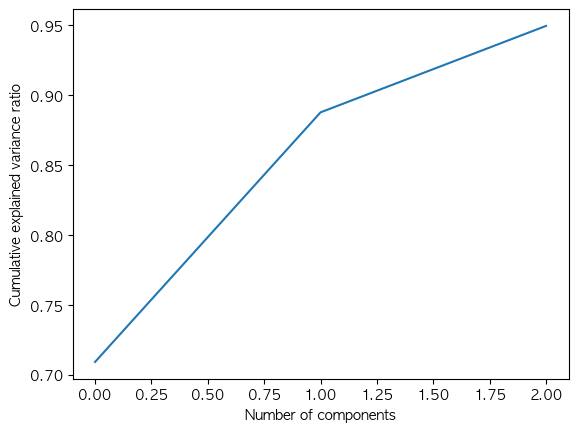

In [150]:
# PCA 수행
pca = PCA(n_components=3)
pca_result = pca.fit_transform(scaled_data)

# 변환된 데이터의 크기를 출력합니다.
print('Transformed data shape:', pca_result.shape)

# 변환된 데이터의 처음 5개 샘플을 출력합니다.
print('Transformed data:\n', pca_result[:5])

# 설명된 분산의 비율을 확인합니다.
explained_variance_ratio = pca.explained_variance_ratio_
print('Explained variance ratio:', explained_variance_ratio)

# 누적 설명 분산 비율을 계산합니다.
cumulative_variance_ratio = np.cumsum(explained_variance_ratio)

# 누적 설명 분산 비율을 그래프로 나타냅니다.
plt.plot(cumulative_variance_ratio)
plt.xlabel('Number of components')
plt.ylabel('Cumulative explained variance ratio')
plt.show()


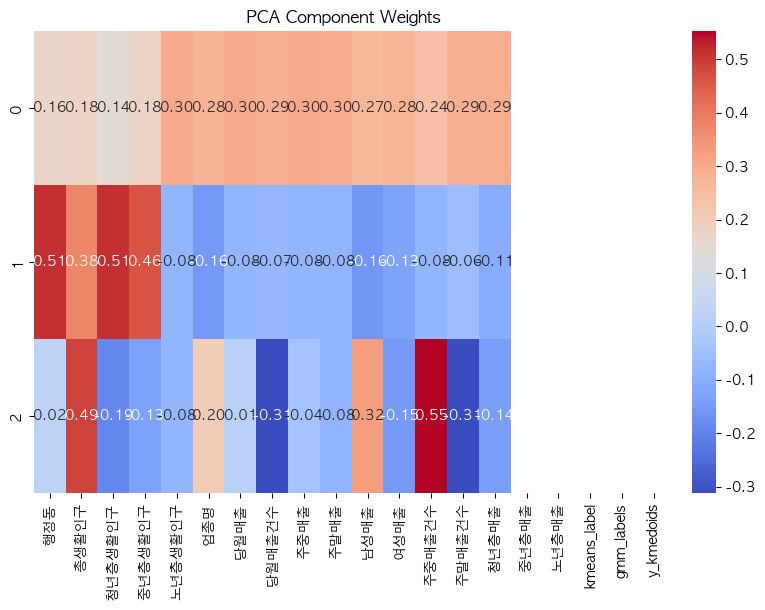

In [152]:

weights = pca.components_
n_components, n_features = weights.shape

# 히트맵 시각화
plt.figure(figsize=(10, 6))
sns.heatmap(weights, cmap='coolwarm', annot=True, fmt='.2f', xticklabels=df.columns)
plt.title('PCA Component Weights')
plt.show()


In [153]:
print(pca.components_)


[[ 0.16440914  0.17711298  0.14269456  0.17728549  0.30022076  0.27690736
   0.29984551  0.28505373  0.30137784  0.29529095  0.2678706   0.27553546
   0.24200589  0.28663506  0.29224869]
 [ 0.51275658  0.37500073  0.51220997  0.46410835 -0.08079303 -0.15511627
  -0.08169261 -0.07422372 -0.08056063 -0.08251783 -0.15953925 -0.12738542
  -0.07914889 -0.05700906 -0.10693222]
 [ 0.02253265  0.49142486 -0.19295061 -0.13060506 -0.08013217  0.20456653
   0.01400615 -0.30988655 -0.03525657 -0.08475157  0.32327558 -0.15286492
   0.55249884 -0.31211409 -0.14227076]]


In [154]:
# Create a PCA object.
pca = PCA(n_components=2)

# Normalize data using StandardScaler before extracting principal components.
X_scaled = StandardScaler().fit_transform(data)

# Perform principal component analysis.
X_pca = pca.fit_transform(X_scaled)

/Users/yeong-gwang/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/yeong-gwang/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/yeong-gwang/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/yeong-gwang/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_

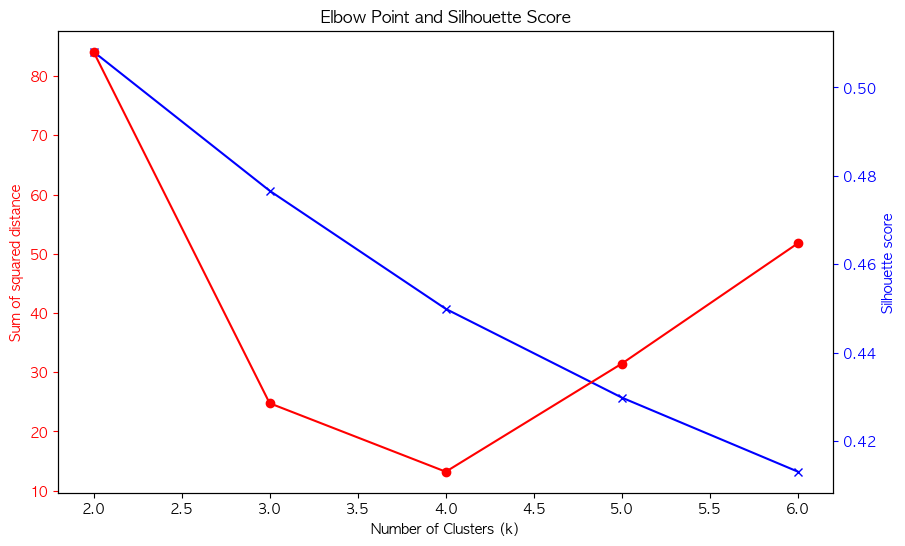

In [155]:
# 엘보우 포인트와 실루엣 계수를 저장할 리스트 초기화
sse = []
silhouette_coefficients = []

# 클러스터링을 위한 k 값 범위 설정
k_range = range(2, 7)

for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_pca)
    sse.append(kmeans.inertia_)
    
    score = silhouette_score(X_pca, kmeans.labels_)
    silhouette_coefficients.append(score)

# 엘보우 포인트 그래프 그리기
fig, ax = plt.subplots(figsize=(10, 6))
ax.plot(k_range, sse, 'bx-')
ax.set_xlabel('Number of Clusters (k)')
ax.set_ylabel('Sum of squared distance', color='r')
ax.set_title('Elbow Point and Silhouette Score')
ax.tick_params('y', colors='r')

# 실루엣 그래프 그리기
ax2 = ax.twinx()
ax2.plot(k_range, silhouette_coefficients, 'ro-')
ax2.set_ylabel('Silhouette score', color='b')
ax2.tick_params('y', colors='b')

plt.show()

/Users/yeong-gwang/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/yeong-gwang/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1420: FutureWarning: algorithm='auto' is deprecated, it will be removed in 1.3. Using 'lloyd' instead.
  warnings.warn(


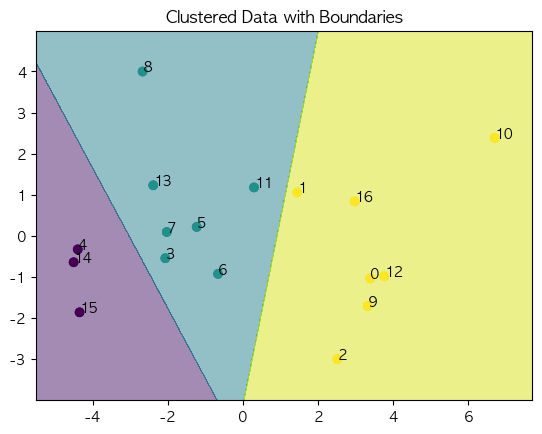

In [157]:

# Create a PCA object.
pca = PCA(n_components=2)

# Normalize data using StandardScaler before extracting principal components.
X_scaled = StandardScaler().fit_transform(data)

# Perform principal component analysis.
X_pca = pca.fit_transform(X_scaled)

kmeans = KMeans(n_clusters=3, init='random', algorithm='auto')
kmeans.fit(X_pca)

# Check the cluster label for each data
cluster_labels = kmeans.labels_

# Visualize clustering results
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=cluster_labels)

# Define the range for the grid
x_min, x_max = X_pca[:, 0].min() - 1, X_pca[:, 0].max() + 1
y_min, y_max = X_pca[:, 1].min() - 1, X_pca[:, 1].max() + 1

# Create a meshgrid of points
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01), np.arange(y_min, y_max, 0.01))

# Predict the cluster labels for each point on the grid
Z = kmeans.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

# Plot the clustered data and the cluster boundaries
plt.contourf(xx, yy, Z, alpha=0.5)
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=cluster_labels)
# Display index value on scatter plot
for i, point in enumerate(X_pca):
    plt.annotate(str(i), xy=point)
    
plt.title('Clustered Data with Boundaries')
plt.show()

#군집화 = 6

In [158]:
df #-> 보라색 군집화 -> 석관동, 종암동
# ->파스텔 파란색? -> 성북동, 돈암2동, 월곡2동, 길음2동
df['kmeans_label']=cluster_labels
df[df['kmeans_label']==1]
df

,행정동,총생활인구,청년층생활인구,중년층생활인구,노년층생활인구,업종명,당월매출,당월매출건수,주중매출,주말매출,남성매출,여성매출,주중매출건수,주말매출건수,청년층매출,중년층매출,노년층매출,kmeans_label,gmm_labels,y_kmedoids
0,성북동,20029.275242,705.976749,798.124651,762.116328,커피-음료,9.127987e+08,91175,617979023.0,294819638.0,335082498.0,530170213.0,64173,27002,170776101,417765765.0,276710851.0,2,1,3
1,삼선동,25794.126261,1174.415744,980.947816,796.235593,커피-음료,5.740842e+08,81431,418297483.0,155786688.0,231590833.0,337911029.0,61397,20034,181349430,221484570.0,166667867.0,2,0,3
4,돈암2동,13693.338759,369.306231,569.242425,521.320618,커피-음료,6.720000e+08,166109,457019137.0,214980863.0,329013164.0,342986836.0,118360,47749,106427970,330398555.0,235173475.0,2,1,0
6,보문동,15573.252558,594.333209,594.697649,583.734081,커피-음료,3.058762e+08,41844,217210327.0,88665912.0,127998322.0,173390342.0,30010,11834,77394749,152460029.0,71533888.0,1,0,1
7,정릉1동,14137.068857,385.162319,588.872822,515.538664,커피-음료,7.285824e+07,12110,46631020.0,26227224.0,26644391.0,46213853.0,7776,4334,22280132,32722111.0,17856001.0,0,2,2
8,정릉2동,19474.082560,610.331443,766.392796,757.534399,커피-음료,3.834224e+08,39566,258181553.0,125240877.0,163227841.0,197684530.0,27601,11965,49734531,148638211.0,162539624.0,1,0,1
9,정릉3동,17000.780147,1080.922840,422.364444,471.641148,커피-음료,3.904862e+08,93607,342444277.0,48041943.0,176096081.0,208331717.0,85887,7720,192530259,79067069.0,112830469.0,1,0,1
10,정릉4동,18306.562778,604.699627,685.126756,733.101946,커피-음료,2.760877e+08,53270,221813188.0,54274528.0,103485678.0,148606366.0,43454,9816,101674298,87688653.0,62729093.0,1,0,1
11,길음1동,34012.789809,886.469838,1442.269362,992.788750,커피-음료,1.041585e+08,15042,74540807.0,29617690.0,40674987.0,62923454.0,10970,4072,15393875,60701443.0,27503123.0,1,2,1
12,길음2동,18238.809083,495.892139,808.117392,648.787250,커피-음료,9.286120e+08,106985,678532633.0,250079400.0,316603992.0,578183252.0,78473,28512,119448668,514330615.0,261007963.0,2,1,0


In [159]:
cluster_labels

array([2, 2, 2, 1, 0, 1, 1, 1, 1, 2, 2, 1, 2, 1, 0, 0, 2], dtype=int32)

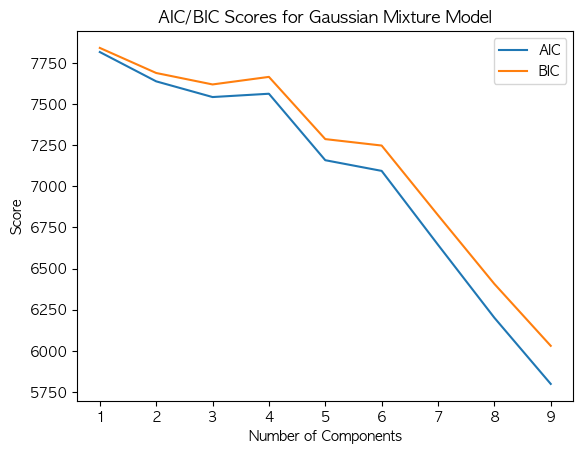

In [160]:
from sklearn.mixture import GaussianMixture

n_components_range = range(1, 10)
aic_values = []
bic_values = []
for n_components in n_components_range:
    #model = GaussianMixture(n_components=n_components, random_state=0)
    model = GaussianMixture(n_components=n_components, covariance_type='diag', random_state=0)
#covariance_type을 변경하니 해결됨 ->diag 
    model.fit(data)  # X는 클러스터링할 데이터입니다.
    aic = model.aic(data)
    bic = model.bic(data)
    aic_values.append(aic)
    bic_values.append(bic)

#AIC와 BIC 값을 플롯에 표시합니다.
plt.plot(n_components_range, aic_values, label='AIC')
plt.plot(n_components_range, bic_values, label='BIC')

# 플롯의 스타일과 레이블 등을 설정합니다.
plt.title('AIC/BIC Scores for Gaussian Mixture Model')
plt.xlabel('Number of Components')
plt.ylabel('Score')
plt.legend()

# 그래프를 보여줍니다.
plt.show()

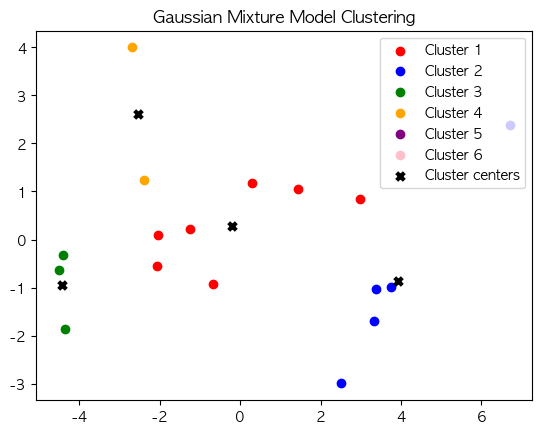

In [163]:
# gmm 모델 인스턴스화
gmm = GaussianMixture(n_components=4, random_state=42)

# 모델 학습
gmm.fit(X_pca)

# 클러스터 예측
centers = gmm.means_

labels = gmm.predict(X_pca)

pca = PCA(n_components=2)
pca_result = pca.fit_transform(X_pca)

colors = ['red', 'blue', 'green', 'orange', 'purple','pink']

fig, ax = plt.subplots()

for i in range(6):
    ax.scatter(pca_result[labels == i, 0], pca_result[labels == i, 1], color=colors[i], label=f"Cluster {i+1}")
ax.scatter(centers[:, 0], centers[:, 1], color='black', marker='x', s=30, linewidth=3, label="Cluster centers")

# Chart settings
ax.set_title('Gaussian Mixture Model Clustering')
ax.legend()
plt.show()
# 1 11 2

In [164]:
labels

array([1, 0, 1, 0, 2, 0, 0, 0, 3, 1, 1, 0, 1, 3, 2, 2, 0])

In [165]:
df['gmm_labels']=labels
df

,행정동,총생활인구,청년층생활인구,중년층생활인구,노년층생활인구,업종명,당월매출,당월매출건수,주중매출,주말매출,남성매출,여성매출,주중매출건수,주말매출건수,청년층매출,중년층매출,노년층매출,kmeans_label,gmm_labels,y_kmedoids
0,성북동,20029.275242,705.976749,798.124651,762.116328,커피-음료,9.127987e+08,91175,617979023.0,294819638.0,335082498.0,530170213.0,64173,27002,170776101,417765765.0,276710851.0,2,1,3
1,삼선동,25794.126261,1174.415744,980.947816,796.235593,커피-음료,5.740842e+08,81431,418297483.0,155786688.0,231590833.0,337911029.0,61397,20034,181349430,221484570.0,166667867.0,2,0,3
4,돈암2동,13693.338759,369.306231,569.242425,521.320618,커피-음료,6.720000e+08,166109,457019137.0,214980863.0,329013164.0,342986836.0,118360,47749,106427970,330398555.0,235173475.0,2,1,0
6,보문동,15573.252558,594.333209,594.697649,583.734081,커피-음료,3.058762e+08,41844,217210327.0,88665912.0,127998322.0,173390342.0,30010,11834,77394749,152460029.0,71533888.0,1,0,1
7,정릉1동,14137.068857,385.162319,588.872822,515.538664,커피-음료,7.285824e+07,12110,46631020.0,26227224.0,26644391.0,46213853.0,7776,4334,22280132,32722111.0,17856001.0,0,2,2
8,정릉2동,19474.082560,610.331443,766.392796,757.534399,커피-음료,3.834224e+08,39566,258181553.0,125240877.0,163227841.0,197684530.0,27601,11965,49734531,148638211.0,162539624.0,1,0,1
9,정릉3동,17000.780147,1080.922840,422.364444,471.641148,커피-음료,3.904862e+08,93607,342444277.0,48041943.0,176096081.0,208331717.0,85887,7720,192530259,79067069.0,112830469.0,1,0,1
10,정릉4동,18306.562778,604.699627,685.126756,733.101946,커피-음료,2.760877e+08,53270,221813188.0,54274528.0,103485678.0,148606366.0,43454,9816,101674298,87688653.0,62729093.0,1,0,1
11,길음1동,34012.789809,886.469838,1442.269362,992.788750,커피-음료,1.041585e+08,15042,74540807.0,29617690.0,40674987.0,62923454.0,10970,4072,15393875,60701443.0,27503123.0,1,3,1
12,길음2동,18238.809083,495.892139,808.117392,648.787250,커피-음료,9.286120e+08,106985,678532633.0,250079400.0,316603992.0,578183252.0,78473,28512,119448668,514330615.0,261007963.0,2,1,0


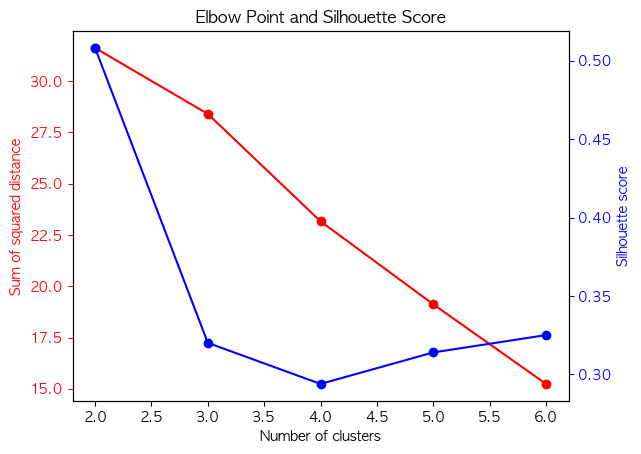

In [166]:
# k-medoids 알고리즘 적용
elbow_scores = []
silhouette_scores = []
for n_clusters in range(2, 7):
    kmedoids = KMedoids(n_clusters=n_clusters).fit(X_pca)
    elbow_scores.append(kmedoids.inertia_)
    silhouette_scores.append(silhouette_score(X_pca, kmedoids.labels_))

# 엘보우 포인트와 실루엣 값을 그래프에 시각화
fig, ax1 = plt.subplots()

# 엘보우 포인트 그래프
ax1.plot(range(2, 7), elbow_scores, 'o-', color='r')
ax1.set_xlabel('Number of clusters')
ax1.set_ylabel('Sum of squared distance', color='r')
ax1.tick_params('y', colors='r')

# 실루엣 값 그래프
ax2 = ax1.twinx()
ax2.plot(range(2, 7), silhouette_scores, 'o-', color='b')
ax2.set_ylabel('Silhouette score', color='b')
ax2.tick_params('y', colors='b')

plt.title('Elbow Point and Silhouette Score')
plt.show()

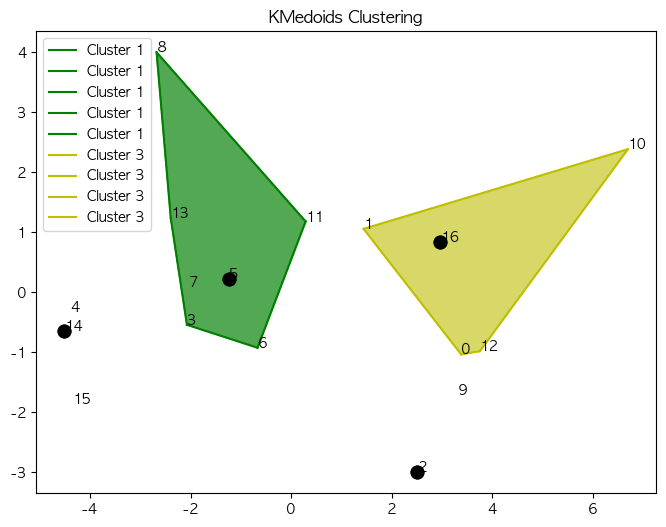

In [94]:
from scipy.spatial import ConvexHull
from sklearn_extra.cluster import KMedoids
import matplotlib.pyplot as plt
from matplotlib.lines import Line2D

# Assume X_pca is your data
# ...

# Create and train KMedoids models
kmedoids = KMedoids(n_clusters=4, random_state=0)
y_kmedoids = kmedoids.fit_predict(X_pca)

# Define cluster colors
colors = ['r', 'g', 'b', 'y']

# Create subplots
fig, ax = plt.subplots(figsize=(8, 6))

# Create a list to store Line2D objects for the legend
legend_lines = []

# Plot each cluster with different color and label
for i in range(4):
    cluster_points = X_pca[y_kmedoids == i]
    
    if len(cluster_points) >= 4:
        # Get indices of outermost points in the cluster
        hull = ConvexHull(cluster_points)
        outermost_points_idx = hull.vertices
        
        # Plot lines connecting outermost points and fill interior space
        n_points = len(outermost_points_idx)
        for j in range(n_points):
            line = ax.plot([cluster_points[outermost_points_idx[j], 0], cluster_points[outermost_points_idx[(j+1)%n_points], 0]],
                           [cluster_points[outermost_points_idx[j], 1], cluster_points[outermost_points_idx[(j+1)%n_points], 1]], color=colors[i])
            ax.fill(cluster_points[outermost_points_idx, 0], cluster_points[outermost_points_idx, 1], color=colors[i], alpha=0.2)
            
            # Append Line2D object to the legend_lines list
            legend_lines.append(Line2D([0], [0], color=colors[i], label=f'Cluster {i}'))

        # Plot Medoids as black markers
        medoids = kmedoids.cluster_centers_
        ax.scatter(medoids[:, 0], medoids[:, 1], marker='o', s=50,
                   linewidths=3, color='black', zorder=10, label='Medoids')

# Add point indices to the plot
for i, point in enumerate(X_pca):
    ax.annotate(str(i), xy=point)

# Set plot title
ax.set_title('KMedoids Clustering')

# Add legend with custom lines
ax.legend(handles=legend_lines)

# Show the plot
plt.show()


In [167]:
df['y_kmedoids']=y_kmedoids
df

,행정동,총생활인구,청년층생활인구,중년층생활인구,노년층생활인구,업종명,당월매출,당월매출건수,주중매출,주말매출,남성매출,여성매출,주중매출건수,주말매출건수,청년층매출,중년층매출,노년층매출,kmeans_label,gmm_labels,y_kmedoids
0,성북동,20029.275242,705.976749,798.124651,762.116328,커피-음료,9.127987e+08,91175,617979023.0,294819638.0,335082498.0,530170213.0,64173,27002,170776101,417765765.0,276710851.0,2,1,0
1,삼선동,25794.126261,1174.415744,980.947816,796.235593,커피-음료,5.740842e+08,81431,418297483.0,155786688.0,231590833.0,337911029.0,61397,20034,181349430,221484570.0,166667867.0,2,0,0
4,돈암2동,13693.338759,369.306231,569.242425,521.320618,커피-음료,6.720000e+08,166109,457019137.0,214980863.0,329013164.0,342986836.0,118360,47749,106427970,330398555.0,235173475.0,2,1,2
6,보문동,15573.252558,594.333209,594.697649,583.734081,커피-음료,3.058762e+08,41844,217210327.0,88665912.0,127998322.0,173390342.0,30010,11834,77394749,152460029.0,71533888.0,1,0,3
7,정릉1동,14137.068857,385.162319,588.872822,515.538664,커피-음료,7.285824e+07,12110,46631020.0,26227224.0,26644391.0,46213853.0,7776,4334,22280132,32722111.0,17856001.0,0,2,4
8,정릉2동,19474.082560,610.331443,766.392796,757.534399,커피-음료,3.834224e+08,39566,258181553.0,125240877.0,163227841.0,197684530.0,27601,11965,49734531,148638211.0,162539624.0,1,0,3
9,정릉3동,17000.780147,1080.922840,422.364444,471.641148,커피-음료,3.904862e+08,93607,342444277.0,48041943.0,176096081.0,208331717.0,85887,7720,192530259,79067069.0,112830469.0,1,0,3
10,정릉4동,18306.562778,604.699627,685.126756,733.101946,커피-음료,2.760877e+08,53270,221813188.0,54274528.0,103485678.0,148606366.0,43454,9816,101674298,87688653.0,62729093.0,1,0,3
11,길음1동,34012.789809,886.469838,1442.269362,992.788750,커피-음료,1.041585e+08,15042,74540807.0,29617690.0,40674987.0,62923454.0,10970,4072,15393875,60701443.0,27503123.0,1,3,1
12,길음2동,18238.809083,495.892139,808.117392,648.787250,커피-음료,9.286120e+08,106985,678532633.0,250079400.0,316603992.0,578183252.0,78473,28512,119448668,514330615.0,261007963.0,2,1,2


# KMEANS / GMM / PAM 군집화 결과 비교

In [168]:
clustering_result=df[['행정동','kmeans_label','gmm_labels','y_kmedoids']]
clustering_result

,행정동,kmeans_label,gmm_labels,y_kmedoids
0,성북동,2,1,0
1,삼선동,2,0,0
4,돈암2동,2,1,2
6,보문동,1,0,3
7,정릉1동,0,2,4
8,정릉2동,1,0,3
9,정릉3동,1,0,3
10,정릉4동,1,0,3
11,길음1동,1,3,1
12,길음2동,2,1,2


In [177]:
df

,행정동,총생활인구,청년층생활인구,중년층생활인구,노년층생활인구,업종명,당월매출,당월매출건수,주중매출,주말매출,남성매출,여성매출,주중매출건수,주말매출건수,청년층매출,중년층매출,노년층매출,kmeans_label,gmm_labels,y_kmedoids
0,성북동,20029.275242,705.976749,798.124651,762.116328,커피-음료,9.127987e+08,91175,617979023.0,294819638.0,335082498.0,530170213.0,64173,27002,170776101,417765765.0,276710851.0,2,1,0
1,삼선동,25794.126261,1174.415744,980.947816,796.235593,커피-음료,5.740842e+08,81431,418297483.0,155786688.0,231590833.0,337911029.0,61397,20034,181349430,221484570.0,166667867.0,2,0,0
4,돈암2동,13693.338759,369.306231,569.242425,521.320618,커피-음료,6.720000e+08,166109,457019137.0,214980863.0,329013164.0,342986836.0,118360,47749,106427970,330398555.0,235173475.0,2,1,2
6,보문동,15573.252558,594.333209,594.697649,583.734081,커피-음료,3.058762e+08,41844,217210327.0,88665912.0,127998322.0,173390342.0,30010,11834,77394749,152460029.0,71533888.0,1,0,3
7,정릉1동,14137.068857,385.162319,588.872822,515.538664,커피-음료,7.285824e+07,12110,46631020.0,26227224.0,26644391.0,46213853.0,7776,4334,22280132,32722111.0,17856001.0,0,2,4
8,정릉2동,19474.082560,610.331443,766.392796,757.534399,커피-음료,3.834224e+08,39566,258181553.0,125240877.0,163227841.0,197684530.0,27601,11965,49734531,148638211.0,162539624.0,1,0,3
9,정릉3동,17000.780147,1080.922840,422.364444,471.641148,커피-음료,3.904862e+08,93607,342444277.0,48041943.0,176096081.0,208331717.0,85887,7720,192530259,79067069.0,112830469.0,1,0,3
10,정릉4동,18306.562778,604.699627,685.126756,733.101946,커피-음료,2.760877e+08,53270,221813188.0,54274528.0,103485678.0,148606366.0,43454,9816,101674298,87688653.0,62729093.0,1,0,3
11,길음1동,34012.789809,886.469838,1442.269362,992.788750,커피-음료,1.041585e+08,15042,74540807.0,29617690.0,40674987.0,62923454.0,10970,4072,15393875,60701443.0,27503123.0,1,3,1
12,길음2동,18238.809083,495.892139,808.117392,648.787250,커피-음료,9.286120e+08,106985,678532633.0,250079400.0,316603992.0,578183252.0,78473,28512,119448668,514330615.0,261007963.0,2,1,2


In [174]:
kmeans=clustering_result.sort_values(by='kmeans_label',ascending=True)
kmeans

,행정동,kmeans_label,gmm_labels,y_kmedoids
17,장위2동,0,2,4
7,정릉1동,0,2,4
18,장위3동,0,2,4
11,길음1동,1,3,1
16,장위1동,1,3,3
6,보문동,1,0,3
8,정릉2동,1,0,3
9,정릉3동,1,0,3
10,정릉4동,1,0,3
14,월곡1동,1,0,3


In [175]:
gmm=clustering_result.sort_values(by='gmm_labels',ascending=True)
gmm

,행정동,kmeans_label,gmm_labels,y_kmedoids
19,석관동,2,0,0
1,삼선동,2,0,0
6,보문동,1,0,3
14,월곡1동,1,0,3
8,정릉2동,1,0,3
9,정릉3동,1,0,3
10,정릉4동,1,0,3
15,월곡2동,2,1,0
13,종암동,2,1,0
0,성북동,2,1,0


In [176]:
pam=clustering_result.sort_values(by='y_kmedoids',ascending=True)
pam

,행정동,kmeans_label,gmm_labels,y_kmedoids
0,성북동,2,1,0
15,월곡2동,2,1,0
13,종암동,2,1,0
19,석관동,2,0,0
1,삼선동,2,0,0
11,길음1동,1,3,1
12,길음2동,2,1,2
4,돈암2동,2,1,2
8,정릉2동,1,0,3
9,정릉3동,1,0,3
